# Lab 3 : Clustering

### Group 3 - Members:

_Tai Chowdhury_<br>
_Apurv Mittal_<br>
_Ravi Sivaraman_<br>
_Seemant Srivastava_<br>


## Business Understanding 1

The weather prediction has been of interest for ages as it effects all of us in our day to day life in many ways. Ability to predict with high accuracy, if its going to rain today or tomorrow and how much can help us plan our day better and we can take precautions if needed.

We have acquired the Australian Weather dataset from Kaggle portal. It contains 10 years of weather data collected from many locations across Australia. These are daily weather observations. There are 145,459 observations with 23 attributes. These attributes describes temperatures, wind, cloud, pressure, and humidity conditions both. There numeric data are broken down into morning (am) and afternoon (pm). 

This dataset can be useful for scientific weather reporting and analysis projects for the respective country's regions. These projects can provide solutions to weather prediction problems. For our project, we have chosen RainTomorrow (categorical) and Rainfall (continuous) as predictor variables. `RainTomorrow` is a categorical attribute which indicates whether it is going to rain tomorrow - yes or no. `Rainfall` is a continuous attribute that measures amount of rainfall each of the particular locations have received (in mm). Using our models, we will be able to design an algorithm where the bureau can help to predict rainfall for different regions in Australia.

We will measure the accuracy and effectiveness of our model for categorical variable `RainTomorrow` by using 10-fold cross validation against the confusion matrix measurements like: sensitivity, specificity and accuracy. We can use Logistic Regression, Random Forest and other parametric and non-parametric models to measure the effectiveness and determine the most appropriate model for prediction.

Similarly, We will predict the `Rainfall` (in mm) which is a continous variable using a regression model. We will its effectiveness by using 10-fold cross validation against RMSE (Root Mean Square Error).

Once the machine learning model is built we can test and measure its validity in other geographies and may not just confine to Australia.



Source: https://www.kaggle.com/jsphyg/weather-dataset-rattle-package

## Data Understanding 1

In [4]:
# Import libraries

from scipy import stats
from shapely.geometry import Point
from sklearn import metrics
from sklearn import metrics as mt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import ShuffleSplit
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.utils import resample

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objs as go
import seaborn as sns
import warnings


In [5]:
#Ignore Warnings on final

warnings.filterwarnings('ignore')

In [6]:
# Read the Australia weather data
df = pd.read_csv("weatherAUS.csv")

In [7]:
#  View the top rows of the data imported
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,12/1/08,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,12/2/08,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,12/3/08,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,12/4/08,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,12/5/08,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


Data imported successfully. We can view all the variables and the top rows above. Its visible that there are several null values and we may need to do decide what should we do to accomodate the missing information. As we go along, we will talk abpout the approach we have adopted to handle the sceanrios with missing information.

In [8]:
# A quick look at the variables and the data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

Below are the descriptions for all 23 attributes for our dataset:


    Name 	              Type 	                            Description

    Date               Date  	           The date of observation.

    Location	       Nominal             The name of the location of the weather station.

    MinTemp	           float64	           Minimum temperature in the 24 hours to 9am (in celsius).

    MaxTemp	           float64	           Maximum temperature in the 24 hours to 9am (in celsius).

    Rainfall	       float64	           Precipitation (rainfall) in the 24 hours to 9am (in mm).

    Evaporation	       float64	           "Class A" pan evaporation in the 24 hours to 9am (in mm)

    Sunshine	       float64	           Bright sunshine in the 24 hours to midnight (in hours).

    WindGustDir	       Nominal        	   Direction of strongest gust in the 24 hours to midnight.

    WindGustSpeed	   float64	           Speed of strongest wind gust in the 24 hours to midnight (kmph).

    WindDir9am	       Nominal      	   Wind direction averaged over 10 minutes prior to 9 am.

    WindDir3pm	       Nominal      	   Wind direction averaged over 10 minutes prior to 3 pm.

    WindSpeed9am	   float64	           Wind speed averaged over 10 minutes prior to 9 am (kmph). 

    WindSpeed3pm	   float64	           Wind speed averaged over 10 minutes prior to 3 pm (kmph). 

    Humidity9am	       float64	           Relative humidity at 9 am (in percent).

    Humidity3pm	       float64	           Relative humidity at 3 pm (in percent). 

    Pressure9am	       float64	           Atmospheric pressure mean sea level at 9 am (hectopascals).

    Pressure3pm	       float64	           Atmospheric pressure mean sea level at 3 pm (hectopascals). 

    Cloud9am	       float64	           Fraction of sky obscured by cloud at 9 am (eighths).

    Cloud3pm	       float64	           Fraction of sky obscured by cloud at 3 pm (eighths). 

    Temp9am	           float64	           Temperature at 9 am (in celsius).

    Temp3pm	           float64	           Temperature at 3 pm (in celsius). 

    RainToday	       Nominal      	   Whether it is going to rain current day - Yes or No.

    RainTomorrow	   Nominal      	   Whether there will be rainfall tomorrow - Yes or No.


Source: http://www.bom.gov.au/climate/dwo/IDCJDW0000.shtml

### Data Quality

In [9]:
# summarize the dataset with statistical summary of numeric "float" variables

df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
MinTemp,143975.0,12.194034,6.398495,-8.5,7.6,12.0,16.9,33.9
MaxTemp,144199.0,23.221348,7.119049,-4.8,17.9,22.6,28.2,48.1
Rainfall,142199.0,2.360918,8.478060,0.0,0.0,0.0,0.8,371.0
Evaporation,82670.0,5.468232,4.193704,0.0,2.6,4.8,7.4,145.0
Sunshine,75625.0,7.611178,3.785483,0.0,4.8,8.4,10.6,14.5
WindGustSpeed,135197.0,40.035230,13.607062,6.0,31.0,39.0,48.0,135.0
WindSpeed9am,143693.0,14.043426,8.915375,0.0,7.0,13.0,19.0,130.0
WindSpeed3pm,142398.0,18.662657,8.809800,0.0,13.0,19.0,24.0,87.0
Humidity9am,142806.0,68.880831,19.029164,0.0,57.0,70.0,83.0,100.0
Humidity3pm,140953.0,51.539116,20.795902,0.0,37.0,52.0,66.0,100.0


Ran summary statistics on the imported dataset. We can see the various satistical summary on the "float" (numeric) variables. We see some large variations in the dataset like Evaportaion ranges from 0 to 145, wind gust varies from 6 kmph to 135 kmph. Which are huge variation but are they invalid data or genuine outliers? We will investigate that in the later sections.

In [10]:
# Count of data types

df.dtypes.value_counts()

float64    16
object      7
dtype: int64

In [11]:
# Check for duplicates
df.duplicated().sum()

0

We ran a duplicate check and we identify there are no duplicates in our dataset which means we don't need to take any action to reduce the impact of duplicate data.

In [12]:
# Check for null values

df.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

We can see there are bunch of missing values in our dataset across the variables. Some variables stand out in terms of number of missing information like `Evaporation` and `Sunshine`. We will continue to investigage further.

In [13]:
# Number of total records
len(df)

145460

We have total of 145,460 records. This includes the missing data as well. This calculation is useful in undetstanding the magnitude of missing data. What is the percentage of data is actually missing? We find out below:

In [14]:
# List the percentage of missing information

(df.isnull().sum()/len(df)*100).sort_values(ascending=True)

Date              0.000000
Location          0.000000
MaxTemp           0.866905
MinTemp           1.020899
Temp9am           1.214767
WindSpeed9am      1.214767
Humidity9am       1.824557
WindSpeed3pm      2.105046
Rainfall          2.241853
RainToday         2.241853
RainTomorrow      2.245978
Temp3pm           2.481094
WindDir3pm        2.906641
Humidity3pm       3.098446
WindGustSpeed     7.055548
WindGustDir       7.098859
WindDir9am        7.263853
Pressure3pm      10.331363
Pressure9am      10.356799
Cloud9am         38.421559
Cloud3pm         40.807095
Evaporation      43.166506
Sunshine         48.009762
dtype: float64

We listed the missing data in ascending order to understand what percentage of data is missing. This will help us in determining the most appropriate action we can take to handle the missing information. 

As seen above there are 6 variables which has more than 10% of missing data. `Sunshine`, `Evaporation`, `Cloud at 3 pm`, `Cloud at 9 am` has the most missing data in that order. With more that 38% of missing information, we have to decide how to impute the missing information. If we delete the missing rows, we will lose a lot of important and pertinent information which is not desirable. We need to decide a way to impute the information.

However, before we impute any information, we also notice that `RainToday` and `Rain Tomorrow` also has about equal amount of missing data but the percentage is not very high. Its under 2.5%. And since `Rain Tomorrow` is one of our response variables, we don't want to impute information there based on certain assumption as it may impact the overall predictability of the data and our models may not turn out to be very successful.

With that in mind, we first start with deleting the rows with missing `Rain Today` and `Rain Tomorrow` variable as shown below.

In [15]:
# Removing records which are blank for Rain today and Rain tomorrow

df.dropna(subset = ["RainToday"], inplace=True)
df.dropna(subset = ["RainTomorrow"], inplace=True)

# REFERENCE: https://www.kite.com/python/answers/how-to-drop-empty-rows-from-a-pandas-dataframe-in-python

As explained above, we decided to drop the records with missing (null) data for RainToday and RainTomorrow variables which is under 2.5% of the total dataset.

In [16]:
# Check the null values again
(df.isnull().sum()/len(df)*100).sort_values(ascending=True)

Date              0.000000
RainToday         0.000000
Rainfall          0.000000
RainTomorrow      0.000000
Location          0.000000
MaxTemp           0.218060
MinTemp           0.332417
Temp9am           0.465952
WindSpeed9am      0.749359
Humidity9am       1.077514
WindSpeed3pm      1.797751
Temp3pm           1.863808
Humidity3pm       2.486735
WindDir3pm        2.606775
WindGustSpeed     6.467216
WindGustDir       6.508413
WindDir9am        6.861429
Pressure9am       9.761555
Pressure3pm       9.780022
Cloud9am         37.379161
Cloud3pm         39.843167
Evaporation      42.400222
Sunshine         47.451114
dtype: float64

A quick look at the percentage of missing data after deletion of the missing rows for RainToday and RainTomorrow confirms the data got deleted successfully.

In [17]:
# Seperate the data into categorical and numeric

df_num = df.columns[df.dtypes == 'float64']
df_cat=df.columns[df.dtypes == 'object']
print("Numeric Variables:", df_num)
print("Categorical Variables:", df_cat)

Numeric Variables: Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm'],
      dtype='object')
Categorical Variables: Index(['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm',
       'RainToday', 'RainTomorrow'],
      dtype='object')


In [18]:
df[df_num].groupby([df['RainToday'],df['RainTomorrow']]).mean()

MinTemp    MaxTemp   Rainfall  Evaporation  \
RainToday RainTomorrow                                                 
No        No            11.818967  24.422043   0.063760     6.032209   
          Yes           12.956982  22.360206   0.139003     5.088293   
Yes       No            12.324060  20.642048   7.906851     4.081266   
          Yes           13.469845  19.688553  12.970597     3.877320   

                        Sunshine  WindGustSpeed  WindSpeed9am  WindSpeed3pm  \
RainToday RainTomorrow                                                        
No        No            8.890686      37.821107     13.317527     18.022658   
          Yes           5.062517      44.669880     14.539171     19.550031   
Yes       No            6.678808      40.884074     14.924111     19.339026   
          Yes           3.765870      47.470654     16.563479     20.649129   

                        Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  \
RainToday RainTomorrow                                                       
No        No              64.082293    44.362724  1018.954556  1016.230809   
          Yes             71.589227    63.305238  1015.153728  1012.459066   
Yes       No              77.932642    58.221810  1016.621577  1015.476598   
          Yes             85.460455    75.440652  1013.446272  1012.015427   

                        Cloud9am  Cloud3pm    Temp9am    Temp3pm  
RainToday RainTomorrow                                            
No        No            3.635105  3.684394  17.334427  22.974297  
          Yes           5.562970  6.138312  17.260482  20.276654  
Yes       No            5.436373  5.118582  15.647827  19.267326  
          Yes           6.681342  6.624841  16.010420  17.930996

Since the Rainfall is the interest of this study. We decided to check the mean for all numeric variables based upon the value for `RainToday` and `RainTomorrow` variables. We belive that Rain is a very significant weather event and lots of other events and variations in the weather happen on the account of the Rain, its only appropriate to check how the mean varies for the variables depending upon it rains or not.

As expected, we notice the variation is significant among the variables depending upon the rain event.Like `Humidity` varies significatly (particluarly in the evening) as it rains today or tomorrow versus no rain at all. Similarly cloud cover also sees a significant variation.

We will closely analyze `Evaporation`, `Sunshine`, `Cloud9am`, `Cloud3pm` as these variables has highest number of missing information. We need to determine if its safe to impute the missing information with the mean values for these variables or should be take a different approach.

In [19]:
# Number of null for Evaporation by the RainToday And Rain Tomorrow
df_E = df.Evaporation.isnull().groupby([df['RainToday'],df['RainTomorrow']]).sum()
df_E_mean = df.Evaporation.groupby([df['RainToday'],df['RainTomorrow']]).mean()
print('Number of Nulls in Evaporation grouped by Rain Today and Rain Tomorrow:\n',df_E)
print('\nMean of Evaporation grouped by Rain Today and Rain Tomorrow:\n',df_E_mean)

print('\nOverall Mean of Evaporation:\n',df.Evaporation.mean())

Number of Nulls in Evaporation grouped by Rain Today and Rain Tomorrow:
 RainToday  RainTomorrow
No         No              38964
           Yes              7071
Yes        No               7250
           Yes              6409
Name: Evaporation, dtype: int64

Mean of Evaporation grouped by Rain Today and Rain Tomorrow:
 RainToday  RainTomorrow
No         No              6.032209
           Yes             5.088293
Yes        No              4.081266
           Yes             3.877320
Name: Evaporation, dtype: float64

Overall Mean of Evaporation:
 5.472515506887154


The `Evaporation` has most of its missing values for the days it doesn't rain, which is both `RainToday` and `RainTomorrow` are No. For all other days the number of missing records are comparable.

The average `Evaporation` on the days it doesn't rain i.e. both `RainToday` and `RainTomorrow` are "No" is 6.03 while the average `Evaporation` on the days it rains both Today and Tomorrow is 3.87, which is a variation of more than `55%`.

Based on the above data, its not appropriate to impute a mean value for every missing record of `Evaporation`. We will continue to investigate further.

In [20]:
# Number of null for Cloud 9 AM by the RainToday And Rain Tomorrow
df_C9 = df.Cloud9am.isnull().groupby([df['RainToday'],df['RainTomorrow']]).sum()
df_C9_mean = df.Cloud9am.groupby([df['RainToday'],df['RainTomorrow']]).mean()
print('Number of Nulls in Cloud at 9 AM grouped by Rain Today and Rain Tomorrow:\n',df_C9, '\n')
print('\nMean of Cloud at 9 AM  grouped by Rain Today and Rain Tomorrow:\n',df_C9_mean)
print('\nOverall Mean of Cloud at 9 AM:\n',df.Cloud9am.mean())

Number of Nulls in Cloud at 9 AM grouped by Rain Today and Rain Tomorrow:
 RainToday  RainTomorrow
No         No              36046
           Yes              5964
Yes        No               5762
           Yes              4853
Name: Cloud9am, dtype: int64 


Mean of Cloud at 9 AM  grouped by Rain Today and Rain Tomorrow:
 RainToday  RainTomorrow
No         No              3.635105
           Yes             5.562970
Yes        No              5.436373
           Yes             6.681342
Name: Cloud9am, dtype: float64

Overall Mean of Cloud at 9 AM:
 4.431160817585808


We check the another variable with large number of missing information `Cloud9am` (clouds at 9 am) which has more than 36,000 missing records. In this case also like how we noticed for `Evaporation`, `Sunshine` and `Cloud3pm` the mean value of cloud significantly depends upon if it `RainToday` or `RainTomorrow`.

The clouds at 9 am is significatly higher for the days it rains. Also, the overall mean is much lower.

Considering the above examples, it appropriate to say that we shouldn't impute overall variable mean for the missing records as it'll be significantly wrong based on the fact if it Rains Today and/or Rains Tomorrow or not.

So, we decided to impute data based on the mean of numeric variables for the days of `RainToday` and `RainTomorrow`.

The categorical variables will be imputed based on the mode.

#### Data Imputation

In [21]:
# Impute data (numeric) based on the mean for RainToday and RainTomorrow

df_impute = df
mat_yesno = df[df_num].groupby([df['RainToday'],df['RainTomorrow']]).mean()
RAINTODAY=0
RAINTOMORROW=1
COUNTER = 0
for i in range(2):
    for j in range(2):
        for indexattr in mat_yesno.iloc[COUNTER].index:
            df_impute.loc[(df_impute["RainToday"] == mat_yesno.iloc[COUNTER].name[RAINTODAY] ) 
                          & (df_impute["RainTomorrow"] == mat_yesno.iloc[COUNTER].name[RAINTOMORROW]) 
                          & (df_impute[indexattr].isnull()), indexattr] = mat_yesno.iloc[COUNTER][indexattr]
        COUNTER = COUNTER + 1

        
        
# Impute data (categorical) with mode of each variable

df_impute['WindDir9am'] = df_impute['WindDir9am'].fillna(df_impute['WindDir9am'].mode()[0])
df_impute['WindGustDir'] = df_impute['WindGustDir'].fillna(df_impute['WindGustDir'].mode()[0])
df_impute['WindDir3pm'] = df_impute['WindDir3pm'].fillna(df_impute['WindDir3pm'].mode()[0])

As mentioned above, we imputed data for all numeric variables with the means for the combination of `RainToday` and `RainTomorrow`. We calcualted the value for `RainToday` and `RainTomorrow` both as "No" and imputed the data for the missing variables for such combination, similary calculated `RainToday` as "Yes" and `RainTomorrow` as "No" and imputed the mean value for the variable so and so forth.

For categorical variables `WindDir9am`, `WindDir3pm` are covering the direction of the wind at different 9 am and 3 pm respectively, while `WindGustDir`is the direction of the wind gust. All these variables are about the direction and and the largest missing variable is `6.8%` for Wind Direction at 9 am. We decided to impute this data with the Mode for each of the categorical variable.

#### Outlier Detection and Removal

The Z-score is the signed number of standard deviations by which the value of an observation or data point is above the mean value of what is being observed or measured.
The intuition behind Z-score is to describe any data point by finding their relationship with the Standard Deviation and Mean of the group of data points. Z-score is finding the distribution of data where mean is 0 and standard deviation is 1 i.e. normal distribution.
While calculating the Z-score we re-scale and center the data and look for data points which are too far from zero. These data points which are way too far from zero will be treated as the outliers.
In most of the cases a threshold of 3 or -3 is used i.e if the Z-score value is greater than or less than 3 or -3 respectively, that data point will be identified as outliers.
The first array contains the list of row numbers and second array respective column numbers, for example if z[8][5] is listed to have a Z-score higher than 3, then it means 8th record in 5th column is an outlier.


We found 8,309 outliers for our Rainfall attributes and we have removed the rows using z-score technique.

###### Reference: https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba
###### Reference: https://towardsdatascience.com/detecting-and-treating-outliers-in-python-part-1-4ece5098b755

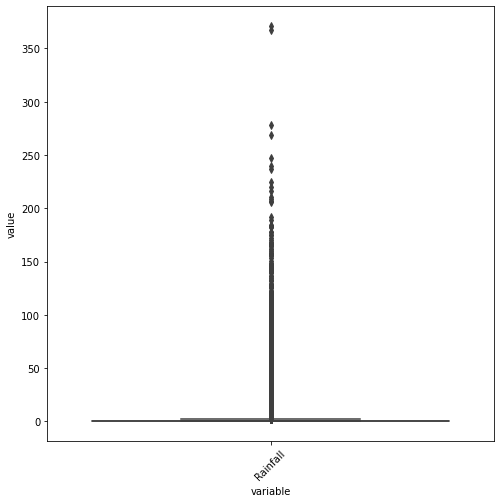

In [22]:
# Outlier - Uni-variate(one variable outlier analysis) using Box plot

df_rainfall = df_impute[['Rainfall']]

fig, ax = plt.subplots(figsize=(8,8))
ax.set_xlabel("va=baseline")
sns.boxplot(x="variable", y="value", data=pd.melt(df_rainfall))
plt.xticks(rotation=45)
plt.show()

In [23]:
# Checking the maximum value of the Rainfall variable
df_impute[['Rainfall']].max()

Rainfall    371.0
dtype: float64

In the above boxplot analysis we see the `Rainfall` data is highly skewed and we can see there are apparent outliers. We notice most of the values (including mean, median) falls around `0`. Which is understandable considering it does't rain most of the days in Australia.

If we look at the extreme value for Rainfall alone, its `371 mm`. Based on the recorded weather history this is not nearly equal to be highest or an outlier. The Highest daily rainfall in 24 hours period is recorded to be 907mm in Australia.

So, we decided to treat this as a valid observation and not change it in any way.

##### Reference:  https://www.ga.gov.au/scientific-topics/national-location-information/dimensions/climatic-extremes

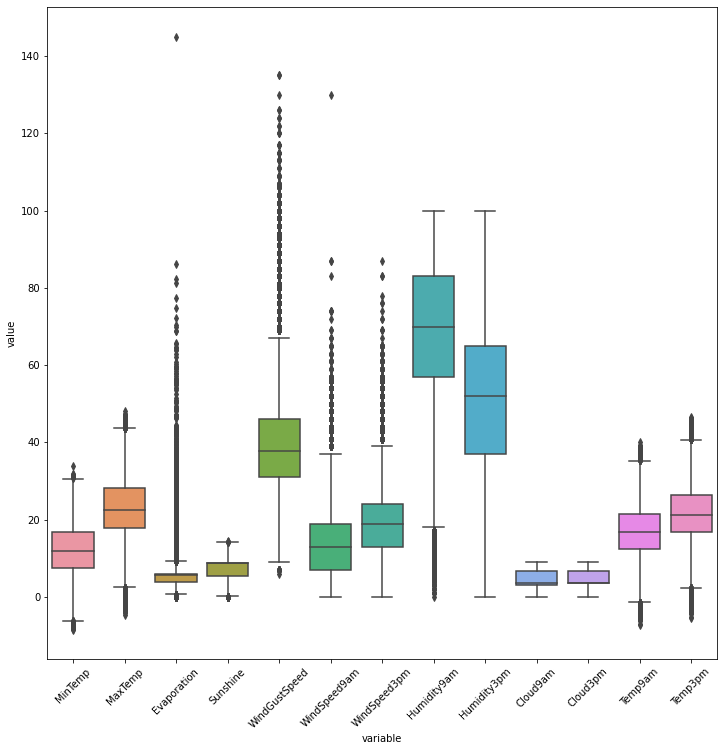

In [24]:
# Boxplot of subset of variables
df_num
df_boxplot = df_impute[['MinTemp', 'MaxTemp', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm']]

fig, ax = plt.subplots(figsize=(12,12))
ax.set_xlabel("va=baseline")
sns.boxplot(x="variable", y="value", data=pd.melt(df_boxplot))
plt.xticks(rotation=45)
plt.show()

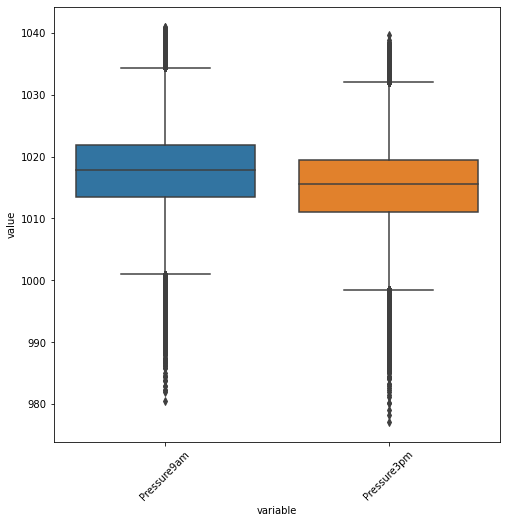

In [25]:
# Boxplot for Pressure at 9 am and 3 pm

df_pressure = df_impute[['Pressure9am', 'Pressure3pm']]


fig, ax = plt.subplots(figsize=(8,8))
ax.set_xlabel("va=baseline")
sns.boxplot(x="variable", y="value", data=pd.melt(df_pressure))
plt.xticks(rotation=45)
plt.show()

In [26]:
# Maximum of each variable
df_impute.max()

Date              9/9/16
Location         Woomera
MinTemp             33.9
MaxTemp             48.1
Rainfall             371
Evaporation          145
Sunshine            14.5
WindGustDir          WSW
WindGustSpeed        135
WindDir9am           WSW
WindDir3pm           WSW
WindSpeed9am         130
WindSpeed3pm          87
Humidity9am          100
Humidity3pm          100
Pressure9am         1041
Pressure3pm       1039.6
Cloud9am               9
Cloud3pm               9
Temp9am             40.2
Temp3pm             46.7
RainToday            Yes
RainTomorrow         Yes
dtype: object

Australia is a land of extremes with temperatures ranging from highs of 40°C in the central desert regions to below freezing in the higher regions of the country's southeast. Sometimes these extremes can be experienced on a single day.

##### Reference: https://www.ga.gov.au/scientific-topics/national-location-information/dimensions/climatic-extremes

Similarly, if we look at the barometeric pressure, the highest barometric pressure ever recorded was 1083.8mb. While the lowest non-tornadic atmospheric pressure ever measured was 870 hPa (0.858 atm; 25.69 inHg).

###### https://en.wikipedia.org/wiki/Atmospheric_pressure

###### https://www.guinnessworldrecords.com/world-records/highest-barometric-pressure-

Based on these evidences, we conclude that even though we have some extreme values in our dataset they are not entirely wrong or improbable. We decided that we will not delete or impute any of our outliers and continue our our analysis with the data as observed. 

## Data Understanding 2

No     109332
Yes     31455
Name: RainToday, dtype: int64
No     109586
Yes     31201
Name: RainTomorrow, dtype: int64


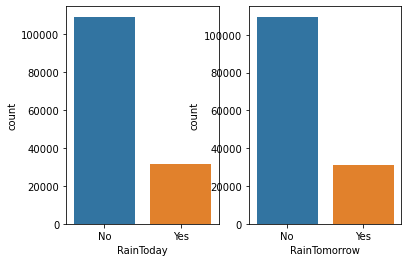

<Figure size 864x864 with 0 Axes>

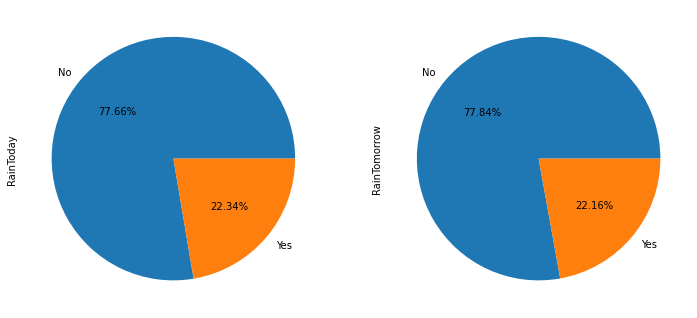

In [27]:
# Count of Rainfall days today and tomorrow

fig, ax =plt.subplots(1,2)
print(df_impute.RainToday.value_counts())
print(df_impute.RainTomorrow.value_counts())
plt.figure(figsize=(12,12))
sns.countplot(data=df_impute,x='RainToday',ax=ax[0])
sns.countplot(data=df_impute,x='RainTomorrow',ax=ax[1])

plt.figure(figsize=(12,12))
plt.subplot(121)
df_impute['RainToday'].value_counts().plot.pie(autopct='%0.2f%%')
plt.subplot(122)
df_impute['RainTomorrow'].value_counts().plot.pie(autopct='%0.2f%%')
plt.show() 

# Reference: https://www.kaggle.com/fahadmehfoooz/rain-prediction-with-90-65-accuracy

As expected the number of days of Rainfall are far lower than the days of no Rainfall. Its true for both our variables RainToday and RainTomorrow. The number of actual rainfall days are quite similar for both RainToday and RainTomorrow.

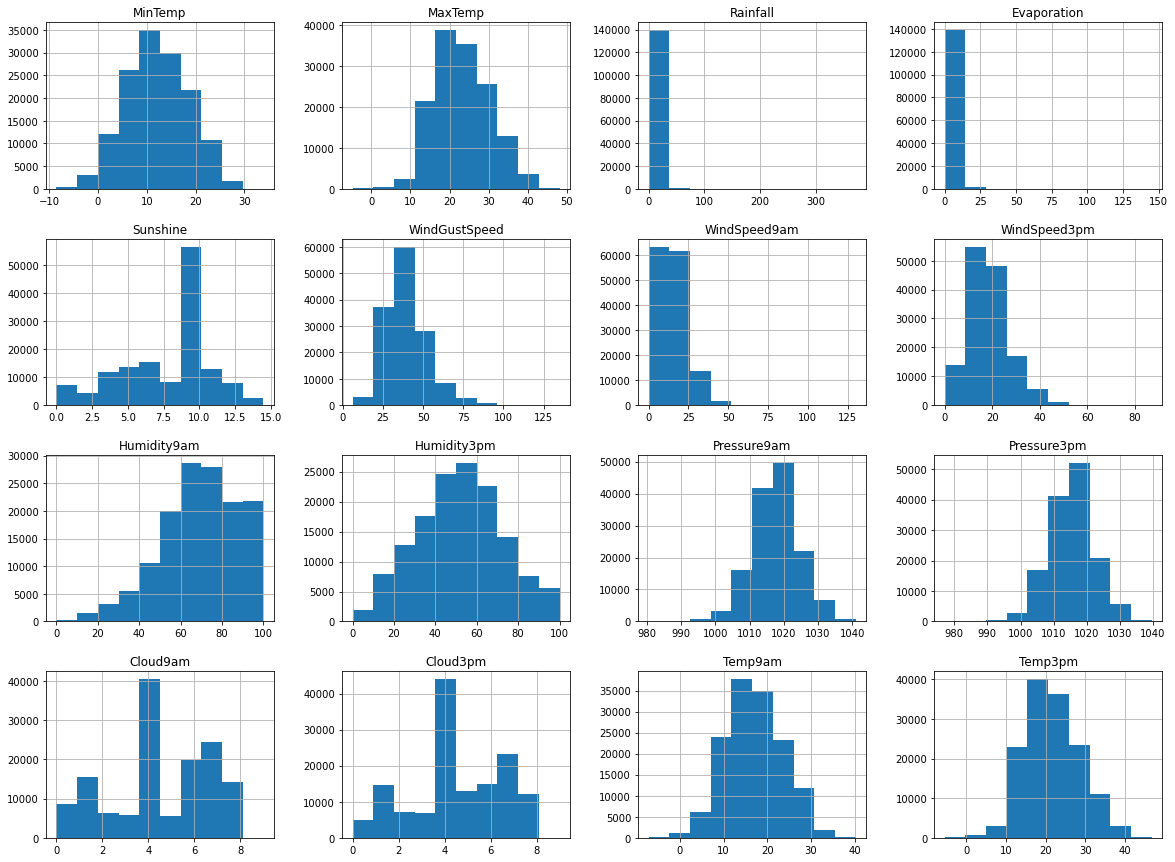

In [28]:
#Histograms for continuous attributes.

fig = plt.figure(figsize = (20,15))
ax = fig.gca()
df_impute.hist(ax=ax)
plt.show()

The above histograms show the distribution for all the continuous variables from our dataset. It can help us to understand the normality (skewness and data range) for each of the continuous variables. Most of the histograms show us that the variables are normally distributed. Few of the variables like `RainFall`, `Evaporation`, and `WindSpeed9am` are right skewed.

`Rainfall` is expected to be skewed as it doesn't rain on most days in Australia.Similarly the `Windspeed` is expectedly skewed too as high winds are not common and most days its low wind speed.

`Evaporation` data requires further analysis in context of `Sunshine` and other variables which will be covered in the later sections. `Evaporation` is a factor of Humidity, Temperature, Windspeed and has to be checked in that context.

<AxesSubplot:xlabel='WindGustDir'>

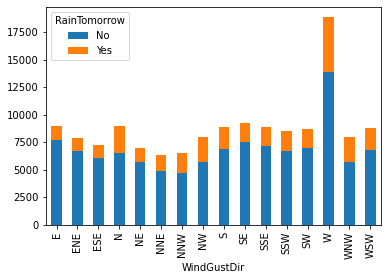

In [29]:
# Wind Direction Count: 


# Wind Direction Count: 
#plt.xticks(rotation=45)
#sns.barplot(x="WindGustDir", hue ="RainTomorrow", data=df_impute)

df_plot = df_impute.groupby(['RainTomorrow', 'WindGustDir']).size().reset_index().pivot(columns='RainTomorrow', index='WindGustDir', values=0)

df_plot.plot(kind='bar', stacked=True)

#Source for stacked boxplot: https://stackoverflow.com/questions/50319614/count-plot-with-stacked-bars-per-hue

In terms of wind direction attribute, most of the data is recorded at the west wind direction. This is true for both current day and the day after.  That's the reason we see most RainTomorrow with wind direction to West and same for the days with No RainTomorrow.

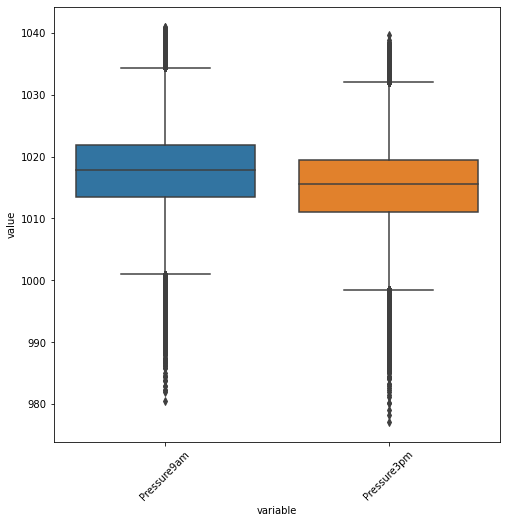

In [31]:
# Boxplot for Pressure at 9 am and 3 pm
df_pressure = df_impute[['Pressure9am', 'Pressure3pm']]
fig, ax = plt.subplots(figsize=(8,8))
ax.set_xlabel("va=baseline")
sns.boxplot(x="variable", y="value", data=pd.melt(df_pressure))
plt.xticks(rotation=45)
plt.show()

The above boxplot indicates `Pressure9am` and `Pressure3pm` are consistant and do not notice much variation throughout the day. `Pressure9am` has slight higher mean value than `Pressure3pm` but the distribution appears to be similar.

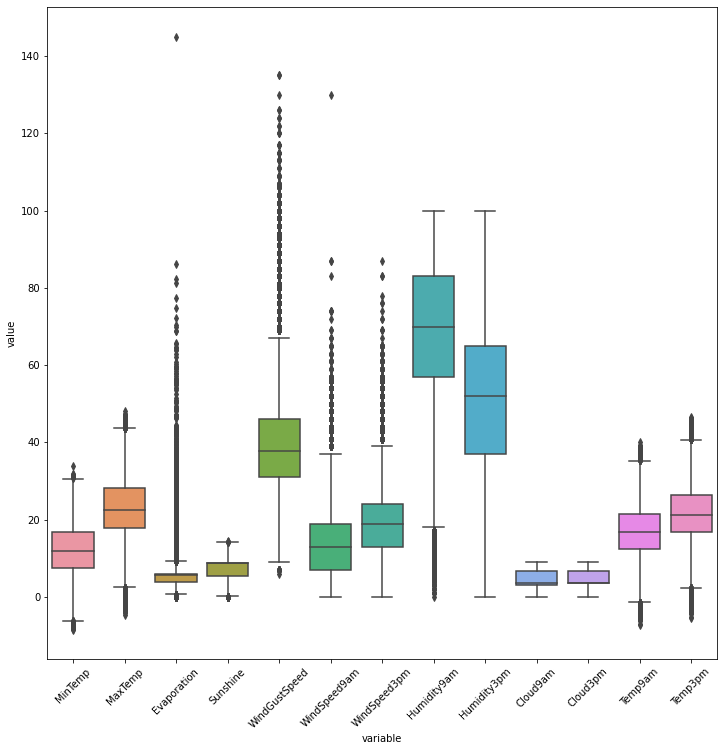

In [32]:
# Boxplot of subset of variables

df_boxplot = df_impute[['MinTemp', 'MaxTemp', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm']]
fig, ax = plt.subplots(figsize=(12,12))
ax.set_xlabel("va=baseline")
sns.boxplot(x="variable", y="value", data=pd.melt(df_boxplot))
plt.xticks(rotation=45)
plt.show()

Above boxplot shows how our continuous attributes are distributed in our dataframe. `WindGustSpeed` has the most variations. 

`Cloud9am` and `Cloud3pm` have the lowest variation and similar distribution. 

`Evaporation` is highly skewed and has longer whisker. It also has the highest outlier.

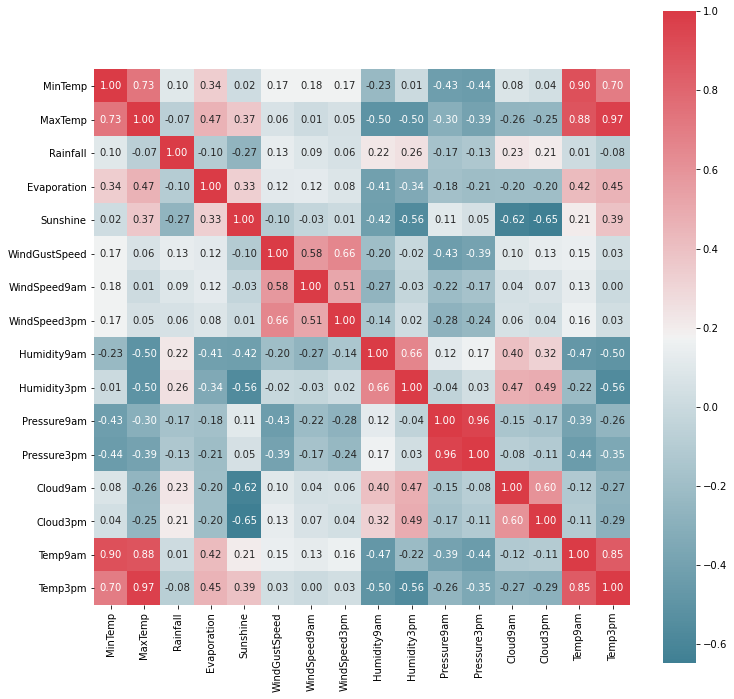

In [33]:
#HeatMap for plot on the correlation matrix using seaborn
plt.figure(figsize=(12,12))
cmap = sns.diverging_palette(220, 10, as_cmap=True) # one of the many color mappings
ax = sns.heatmap(df_impute.corr(), cmap=cmap, square=True, annot=True, fmt='.2f')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

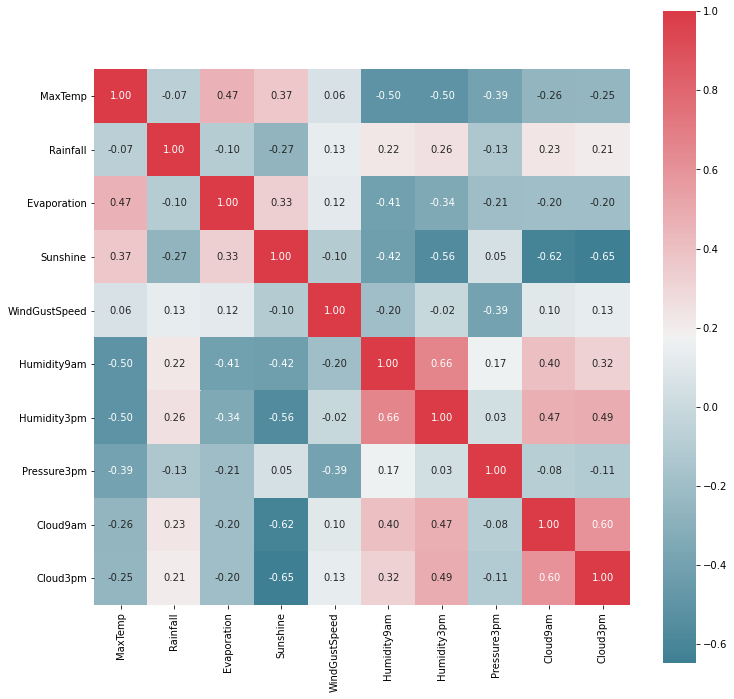

In [38]:
df_imp = df_impute.copy()
del df_imp["Temp9am"]
del df_imp["Temp3pm"]
del df_imp["MinTemp"]
del df_imp["WindSpeed3pm"]
del df_imp["WindSpeed9am"]
del df_imp["Pressure9am"]


#HeatMap for plot on the correlation matrix using seaborn
plt.figure(figsize=(12,12))
cmap = sns.diverging_palette(220, 10, as_cmap=True) # one of the many color mappings
ax = sns.heatmap(df_imp.corr(), cmap=cmap, square=True, annot=True, fmt='.2f')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

df_model = df_imp.copy()

In this correlation matrix, we notice that most of the correlations are positive. Pressure and Humidity seems to have negative correlations agains other attributes but those are not significant. Here are some of the significant correlations we notice:

    MinTemp and MaxTemp

    Temp9am and Temp3pm

    Humidity9am and Humidity3pm

    Cloud9am and Cloud3pm

    Pressure9am and Pressure3pm

    Humidity9am and Humidity 3pm

    WindGustSpeed and WindSpeed9am

    WindGustSpeed and WindSpeed3pm

    WindSpeed9am and WindSpeed3pm

`Humidity` is negatively correlated to `Evaporation` and `Temperature`. Which is significant and appears to be accurate as well. Evaporation is higher during dry conditions. So, the skewness in Evaporation distribution is also impacted by the Humidity in the region.

`Sunshine` also is negatively correlated to `Clouds` which is expected as with cloud cover we will not have sunshine. This gives validity to our data and appears to be following the corret trends.

One common observation is there are stong correlations between morning and late afternoon values for each weather condition category. Only other signifinant correllation we notive is between Cloud(am/pm) and Humidity(am/pm). That is expected as we can usually notice buildup of humidity as the cloud gathers up before rainfall. 

In [39]:
df_impute1=df_impute.copy()

## Data Preparation Part 1

As discussed in *Lab 1*, we have acquired the Australian Weather dataset from Kaggle portal. It contains 10 years of weather data collected from many locations across Australia. These are daily weather observations. There are 145,459 observations with 23 attributes in the original dataset. 

We have chosen `RainTomorrow` (categorical) and `Rainfall` (continuous) as predictor variables. RainTomorrow is a categorical attribute which indicates whether it is going to rain tomorrow - yes or no. Rainfall is a continuous attribute that measures amount of rainfall each of the particular locations have received (in mm). Using our models, we will be able to design an algorithm where the bureau can help to predict rainfall for different regions in Australia.

In this Lab 2 assignment, we have measured the accuracy and effectiveness of our model for categorical variable RainTomorrow by using 10-fold cross validation against the confusion matrix measurements like: Precision, Recall and Accuracy. We have explored the methods of logistic regression and support vector machine (SVM) models on our dataset. 

We have used `scikit-learn` packages for our exploration. We ran logistic regression models with all the available solvers in the `scikit-learn` package and compare the effictiveness and accuracy of the model to predict `RainfallTomorrow`. We also measured the duration of model run from each models to compare model performance and efficiency as well.
 
To get started, we will start with loading all the necessary packages for our analysis. We will start our analysis with `df_impute` which is the imputed dataframe from our last explanatory data analysis Lab 1 project. Using this dataframe will ensure data consistency for all the labs going forward.

#### Dropping columns

We decided to drop `Date` and `Location` as they are not pertinent to our analysis in this Lab 2 project.

In [40]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 140787 entries, 0 to 145458
Data columns (total 17 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           140787 non-null  object 
 1   Location       140787 non-null  object 
 2   MaxTemp        140787 non-null  float64
 3   Rainfall       140787 non-null  float64
 4   Evaporation    140787 non-null  float64
 5   Sunshine       140787 non-null  float64
 6   WindGustDir    140787 non-null  object 
 7   WindGustSpeed  140787 non-null  float64
 8   WindDir9am     140787 non-null  object 
 9   WindDir3pm     140787 non-null  object 
 10  Humidity9am    140787 non-null  float64
 11  Humidity3pm    140787 non-null  float64
 12  Pressure3pm    140787 non-null  float64
 13  Cloud9am       140787 non-null  float64
 14  Cloud3pm       140787 non-null  float64
 15  RainToday      140787 non-null  object 
 16  RainTomorrow   140787 non-null  object 
dtypes: float64(10), object(7)
mem

In [41]:
df_model = df_model.drop(['Date', 'Location'], axis = 1)
df_model.head()

,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,Humidity9am,Humidity3pm,Pressure3pm,Cloud9am,Cloud3pm,RainToday,RainTomorrow
0,22.9,0.6,6.032209,8.890686,W,44.0,W,WNW,71.0,22.0,1007.1,8.000000,3.684394,No,No
1,25.1,0.0,6.032209,8.890686,WNW,44.0,NNW,WSW,44.0,25.0,1007.8,3.635105,3.684394,No,No
2,25.7,0.0,6.032209,8.890686,WSW,46.0,W,WSW,38.0,30.0,1008.7,3.635105,2.000000,No,No
3,28.0,0.0,6.032209,8.890686,NE,24.0,SE,E,45.0,16.0,1012.8,3.635105,3.684394,No,No
4,32.3,1.0,6.032209,8.890686,W,41.0,ENE,NW,82.0,33.0,1006.0,7.000000,8.000000,No,No



We imputed data in EDA project by substituting the missing and `NaN` values. We are reusing the imputed data from EDA (Lab1) project.
Here is the link to the EDA for reference:

https://nbviewer.jupyter.org/github/ravisiv/AussieWeatherEDA/blob/c0ba412cb75da21eba386ea9ea39f645ad6af1d0/DS7331_Lab1_Group3_Ravi_Taifur_Seemant_Apurv_Submission.ipynb


In [42]:
df_model_num = df_model.columns[df_model.dtypes == 'float64']
df_model_cat=df_model.columns[df_model.dtypes == 'object']
print("Numeric Variables:", df_model_num)
print("Categorical Variables:", df_model_cat)

Numeric Variables: Index(['MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed',
       'Humidity9am', 'Humidity3pm', 'Pressure3pm', 'Cloud9am', 'Cloud3pm'],
      dtype='object')
Categorical Variables: Index(['WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow'], dtype='object')


Before continuing further, we need to check which variables are numeric and which are not. As the models expect numerical variables. We will filter and identify non-numeric variables.

`WindGustDir`, `WindDir9am`, `WindDir3pm`, `RainToday` and `RainTomorrow`are not numeric. Here `RainTomorrow` is our response variable. we handle the other variables with hot-one-encoding later in the flow.

In [43]:
# Create a new variable to Identify if it RainToday

df_model["IsRainToday"] = df_model['RainToday']

# Replacing No with 0 and Yes with 1.

df_model['IsRainToday'].replace({'No': 0, 'Yes': 1},inplace = True)

# Do same for RainTomorrow

# Create a new variable to Identify if it RainTomorrow

df_model["IsRainTomorrow"] = df_model['RainTomorrow']

# Replacing No with 0 and Yes with 1.

df_model['IsRainTomorrow'].replace({'No': 0, 'Yes': 1},inplace = True)

del df_model["RainTomorrow"]

Assigning `0` to No values and `1` to Yes values in `RainToday` (Changed to `IsRainToday`)

In [45]:
# Printing the values to check if the data looks good

df_model.head()

,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,Humidity9am,Humidity3pm,Pressure3pm,Cloud9am,Cloud3pm,RainToday,RainTomorrow,IsRainToday
0,22.9,0.6,6.032209,8.890686,W,44.0,W,WNW,71.0,22.0,1007.1,8.000000,3.684394,No,No,0
1,25.1,0.0,6.032209,8.890686,WNW,44.0,NNW,WSW,44.0,25.0,1007.8,3.635105,3.684394,No,No,0
2,25.7,0.0,6.032209,8.890686,WSW,46.0,W,WSW,38.0,30.0,1008.7,3.635105,2.000000,No,No,0
3,28.0,0.0,6.032209,8.890686,NE,24.0,SE,E,45.0,16.0,1012.8,3.635105,3.684394,No,No,0
4,32.3,1.0,6.032209,8.890686,W,41.0,ENE,NW,82.0,33.0,1006.0,7.000000,8.000000,No,No,0


### Label Encoding

Before we create our models, we need to format our attributes. We are converting `RainToday` and `RainTomorrow` into numeric variables to `0` and `1`. We also decided to go ahead with one-hot-encoding `WindGustDir`, `WindDir9am`, and `WindDir3pm` attributes based on the direction of the wind. 

In [58]:

from sklearn import preprocessing

le = preprocessing.LabelEncoder()

#Find all directions in the data

unique_gustdir = np.unique(df_model["WindGustDir"].values)

unique_wind9am = np.unique(df_model["WindDir9am"].values)

unique_wind3pm = np.unique(df_model["WindDir3pm"].values)

all_dirs = np.append(np.append(unique_gustdir,unique_wind9am), unique_wind3pm)

all_unique_dirs = np.unique(all_dirs)

le.fit(all_unique_dirs)


#Transform categorical in to numerical in df_model

df_model["WindGustDir"] = le.transform(df_model["WindGustDir"])
df_model["WindDir9am"] = le.transform(df_model["WindDir9am"])
df_model["WindDir3pm"] = le.transform(df_model["WindDir3pm"])



In [62]:
df_model


,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,Humidity9am,Humidity3pm,Pressure3pm,Cloud9am,Cloud3pm,RainToday,RainTomorrow,IsRainToday
0,22.9,0.6,6.032209,8.890686,13,44.0,13,14,71.0,22.0,1007.1,8.000000,3.684394,No,No,0
1,25.1,0.0,6.032209,8.890686,14,44.0,6,15,44.0,25.0,1007.8,3.635105,3.684394,No,No,0
2,25.7,0.0,6.032209,8.890686,15,46.0,13,15,38.0,30.0,1008.7,3.635105,2.000000,No,No,0
3,28.0,0.0,6.032209,8.890686,4,24.0,9,0,45.0,16.0,1012.8,3.635105,3.684394,No,No,0
4,32.3,1.0,6.032209,8.890686,13,41.0,1,7,82.0,33.0,1006.0,7.000000,8.000000,No,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145454,21.8,0.0,6.032209,8.890686,0,31.0,2,0,59.0,27.0,1021.2,3.635105,3.684394,No,No,0
145455,23.4,0.0,6.032209,8.890686,0,31.0,9,1,51.0,24.0,1020.3,3.635105,3.684394,No,No,0
145456,25.3,0.0,6.032209,8.890686,6,22.0,9,3,56.0,21.0,1019.1,3.635105,3.684394,No,No,0
145457,26.9,0.0,6.032209,8.890686,3,37.0,9,14,53.0,24.0,1016.8,3.635105,3.684394,No,No,0


In [63]:
#Check if Yes is replaced as 1

print("Are there 1's and 0's in the RainToday column?", 
      (df_model['IsRainToday'].sum() > 0) and (df_model['IsRainToday'].sum() < len(df_model['IsRainToday'])))

#Non zero output means there is a mixture of 1's and 0's


Are there 1's and 0's in the RainToday column? True


Checking if the data imputation happened accurately.

In [64]:
df_model_num = df_model.columns[df_model.dtypes != 'object' ]
df_model_cat=df_model.columns[df_model.dtypes == 'object']
print("Numeric Variables:", df_model_num)
print("Categorical Variables:", df_model_cat)

Numeric Variables: Index(['MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustDir',
       'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'IsRainToday'],
      dtype='object')
Categorical Variables: Index(['RainToday', 'RainTomorrow'], dtype='object')


### Remove RainToday feature, as IsRainToday is numerical equivalent of RainToday

In [69]:
del df_model["RainToday"]

Check if all the numerical variables are accurately created and if we still have any non-numeric data.

Assigning the `RainTomorrow` as our response variable (y) and all other variables include one-hot-encoded values as X.

In [70]:
X=df_model[df_model_num]
y = df_model.RainTomorrow
print('features shape:', X.shape) 
print('target shape:', y.shape )

features shape: (140787, 14)
target shape: (140787,)


#### Response Variables
For our dataset, we are using two response variables:

1. `RainTomorrow` - Categorical variable for classification
2. `Rainfall` - Continuous variable for regression

We are going to introduce additional variable in our dataset:

`RainfallAmount` - Categorical variable for rainfall classification. We have covered this in more detail in another section.

#### Down-sampling

Due to large amount of data and multiple models being evaluated in this project, our computers are not able to handle the load and have been crashing which is leading to increased processing time and repetitive work. To avoid this situation we have made few changes in our models.

1. Down Sample the data based on the `RainToday`
2. Reduced the various combinations of hyper tuning parameters to preserve the memory and processing power.
3. Reduced the number of additional models we were running as part of exceptional work, like: XGBOOST, Linear SVC.

In [48]:
#Downsampling before we run our models 
df_model_copy = df_model[df_model.IsRainToday  == np.random.choice(df_model['IsRainToday'].unique())].reset_index(drop=True)
df_model = df_model_copy.copy()


### Data Distribution

Check if the data distribution is balanced or not for the response variable `RainTomorrow`.

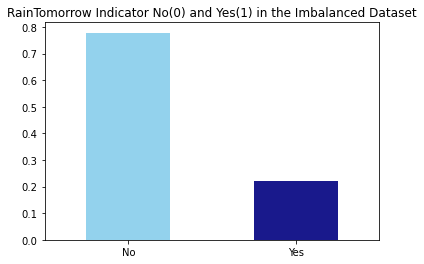

In [71]:

df_impute['RainTomorrow'].value_counts(normalize = True).plot(kind='bar', color= ['skyblue','navy'], alpha = 0.9, rot=0)
plt.title('RainTomorrow Indicator No(0) and Yes(1) in the Imbalanced Dataset')
plt.show()


As expected, we see the data for `RainTomorrow` is imbalanced. Majority of the data is for `No` rain vs. `Yes` for `RainTomorrow`.

We can observe that the presence of `0` and `1` is almost in the `78:22` ratio. We will be cognizant of the fact that our model may be not very effective if we don't solve for imbalance. We will discuss and adjust for this imbalance in our analysis.

In [72]:
df_model_copy = df_model.copy()

In [82]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 140787 entries, 0 to 145458
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   MaxTemp         140787 non-null  float64
 1   Rainfall        140787 non-null  float64
 2   Evaporation     140787 non-null  float64
 3   Sunshine        140787 non-null  float64
 4   WindGustDir     140787 non-null  int64  
 5   WindGustSpeed   140787 non-null  float64
 6   WindDir9am      140787 non-null  int64  
 7   WindDir3pm      140787 non-null  int64  
 8   Humidity9am     140787 non-null  float64
 9   Humidity3pm     140787 non-null  float64
 10  Pressure3pm     140787 non-null  float64
 11  Cloud9am        140787 non-null  float64
 12  Cloud3pm        140787 non-null  float64
 13  IsRainToday     140787 non-null  int64  
 14  IsRainTomorrow  140787 non-null  int64  
dtypes: float64(10), int64(5)
memory usage: 22.2 MB


The above dataframe has float64 and int64data formats. Float64, int64 are all numerical data type. Object is a string data type. 

#### Response Variables

We have three response features in our current dataframe. They are `RainTomorrow`, `Rainfall`, and `RainfallAmount`. `RainTomorrow` and `RainfallAmount` are for our classification models. `Rainfall` is used for continuous regression models. Our primary focus is on `RainTomorrow` and `RainfallAmount` as the prediction for `Rainfall` is not very accurate. We will present the accuracy of this feature in later section. 

In [83]:
df_model.describe()

,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,Humidity9am,Humidity3pm,Pressure3pm,Cloud9am,Cloud3pm,IsRainToday,IsRainTomorrow
count,140787.000000,140787.000000,140787.000000,140787.000000,140787.00000,140787.000000,140787.000000,140787.000000,140787.000000,140787.000000,140787.000000,140787.000000,140787.000000,140787.000000,140787.000000
mean,23.235480,2.349974,5.463856,7.643002,8.05362,39.996073,7.006172,7.785740,68.842614,51.478455,1015.258614,4.393996,4.450403,0.223423,0.221618
std,7.107197,8.465173,3.227628,3.025147,4.69313,13.163395,4.515248,4.547275,18.980993,20.626939,6.701659,2.376728,2.219690,0.416541,0.415337
min,-4.800000,0.000000,0.000000,0.000000,0.00000,6.000000,0.000000,0.000000,0.000000,0.000000,977.100000,0.000000,0.000000,0.000000,0.000000
25%,17.900000,0.000000,3.877320,5.400000,4.00000,31.000000,3.000000,4.000000,57.000000,37.000000,1011.000000,3.000000,3.684394,0.000000,0.000000
50%,22.600000,0.000000,5.800000,8.890686,9.00000,37.821107,7.000000,8.000000,70.000000,52.000000,1015.500000,3.635105,3.684394,0.000000,0.000000
75%,28.200000,0.800000,6.032209,8.890686,13.00000,46.000000,11.000000,12.000000,83.000000,65.000000,1019.400000,6.681342,6.624841,0.000000,0.000000
max,48.100000,371.000000,145.000000,14.500000,15.00000,135.000000,15.000000,15.000000,100.000000,100.000000,1039.600000,9.000000,9.000000,1.000000,1.000000


We ran summary statistics on the final model dataset. We can see the various satistical summary of the features. We see some large variations in the dataset like Evaportaion ranges from 0 to 145, Rainfall varies from 0 mm to 371 mm. Which are huge variation but as determined during `EDA` (Lab 1) those are not outliers and for our analysis we will consider then as valid observations.

# Tai

### Agglomerative clustering

In [87]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering as ag
import scipy.cluster.hierarchy as sch
from sklearn.metrics import silhouette_score as sc

In [88]:
#Downsampling before we run our models 
df_model_copy = df_model[df_model.WindGustSpeed == np.random.choice(df_model['WindGustSpeed'].unique())].reset_index(drop=True)
df_model_ag = df_model_copy.copy()

#X_ag = df_model_ag[['Evaporation', 'Sunshine','Humidity9am', 'Cloud9am','WindGustSpeed', 'Humidity3pm', 'Cloud3pm']]

X_ag = df_model_ag[['Evaporation', 'Sunshine','Pressure3pm', 'WindGustSpeed', 'Humidity3pm', 'Cloud3pm', "IsRainTomorrow"]]


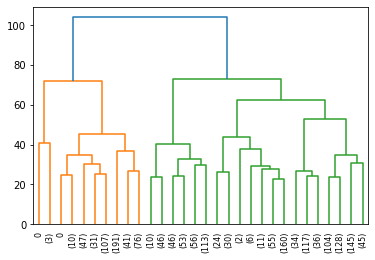

In [89]:
#Dendogram for agglomerative clustering
Z = linkage(X_ag, 'complete')
X_ag = X_ag.set_index('IsRainTomorrow')
dendrogram(Z, leaf_rotation=90, leaf_font_size=8, truncate_mode = 'lastp', labels=X_ag.index)
plt.show()


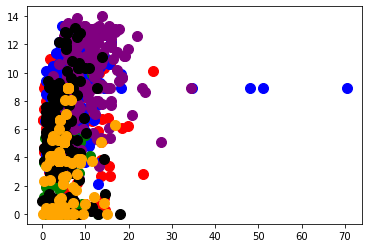

euclidean ward score is  0.26537158354754226


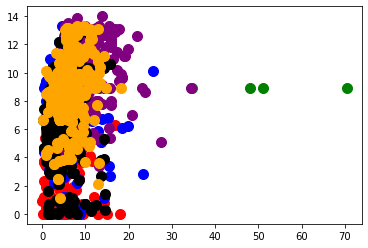

euclidean complete score is  0.2704631959019524


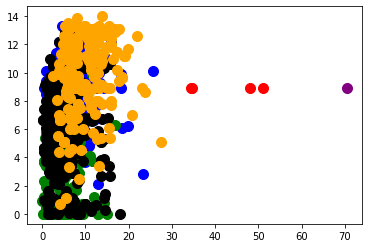

euclidean average score is  0.3557167395829313


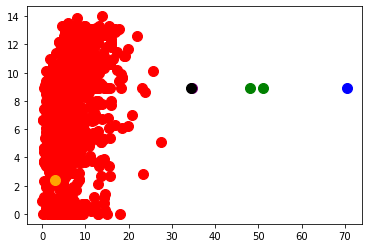

euclidean single score is  0.07607256450622878


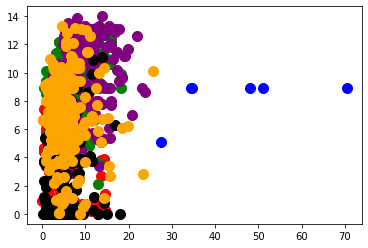

l1 complete score is  0.2528661557931228


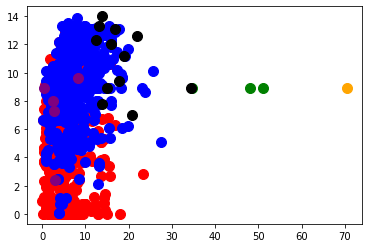

l1 average score is  0.30767390601846006


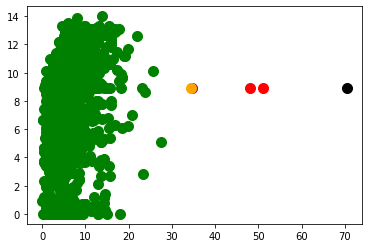

l1 single score is  0.07607256450622878


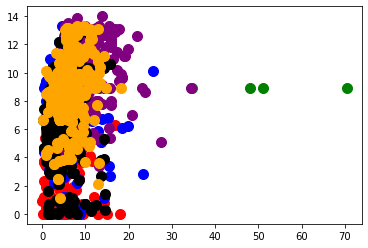

l2 complete score is  0.2704631959019524


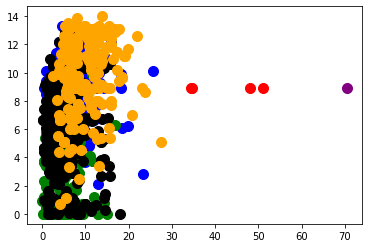

l2 average score is  0.3557167395829313


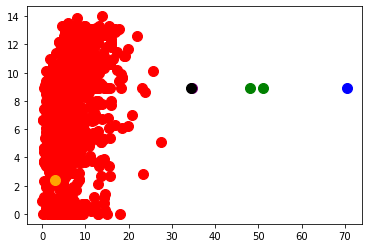

l2 single score is  0.07607256450622878


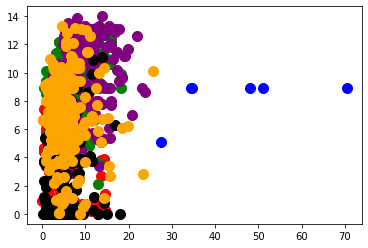

manhattan complete score is  0.2528661557931228


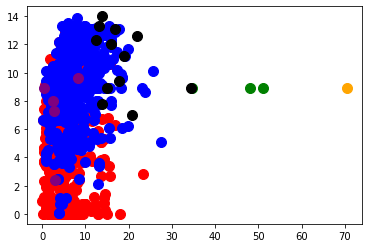

manhattan average score is  0.30767390601846006


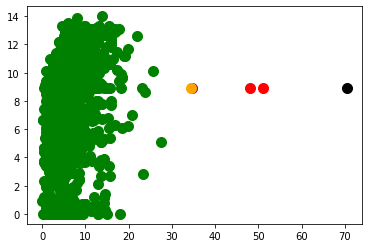

manhattan single score is  0.07607256450622878


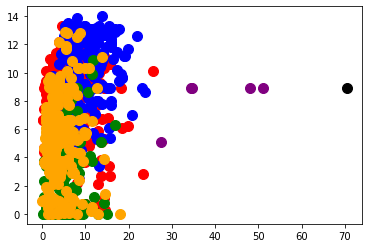

cosine complete score is  0.3289188037237748


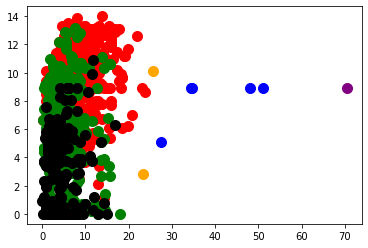

cosine average score is  0.35359205665430044


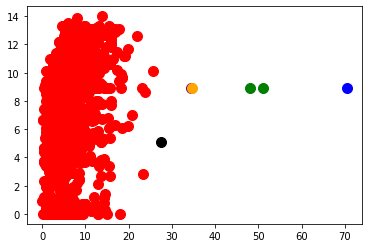

cosine single score is  0.13226746535057762


In [90]:
#Agglomerative Clustering Model
ag_cluster = ag(n_clusters=6, affinity='cosine', linkage='complete')
ag_yhat= ag_cluster.fit_predict(X_ag)

Affinity = ['euclidean', 'l1', 'l2', 'manhattan', 'cosine', 'precomputed']
Linkage = ['ward','complete', 'average', 'single']


for aff in Affinity:
    for link in Linkage:
        try:
            
            ag_cluster = ag(n_clusters=6, affinity= aff, linkage=link)
            ag_yhat= ag_cluster.fit_predict(X_ag)
            plt.scatter(X_ag.values[ag_yhat==0,0], X_ag.values[ag_yhat==0,1], s=100, marker='o', color='red')
            plt.scatter(X_ag.values[ag_yhat==1, 0], X_ag.values[ag_yhat==1, 1], s=100, marker='o', color='blue')
            plt.scatter(X_ag.values[ag_yhat==2, 0], X_ag.values[ag_yhat==2, 1], s=100, marker='o', color='green')
            plt.scatter(X_ag.values[ag_yhat==3, 0], X_ag.values[ag_yhat==3, 1], s=100, marker='o', color='purple')
            plt.scatter(X_ag.values[ag_yhat==4, 0], X_ag.values[ag_yhat==4, 1], s=100, marker='o', color='black')
            plt.scatter(X_ag.values[ag_yhat==5, 0], X_ag.values[ag_yhat==5, 1], s=100, marker='o', color='orange')

            plt.show()

            membership = ag_cluster.labels_
            Score_ag = sc(X_ag, membership)
            print(aff, link, 'score is ', Score_ag)
        except ValueError as ve:
            
            continue
        
        


# Seemant

### Optics

`OPTICS` (Ordering Points To Identify the Clustering Structure), closely related to DBSCAN, finds core sample of high density and expands clusters from them. Unlike DBSCAN, keeps cluster hierarchy for a variable neighborhood radius. Better suited for usage on large datasets than the current sklearn implementation of DBSCAN.

The `OPTICS` algorithm shares many similarities with the `DBSCAN` algorithm, and can be considered a generalization of DBSCAN that relaxes the `eps` requirement from a single value to a `value range`.

The key difference between DBSCAN and OPTICS is that the OPTICS algorithm builds a `reachability graph`, which assigns each sample both a `reachability_` distance, and a spot within the cluster `ordering_` attribute; these two attributes are assigned when the model is fitted, and are used to determine cluster membership. If OPTICS is run with the default value of inf set for `max_eps`, then DBSCAN style cluster extraction can be performed repeatedly in linear time for any given `eps` value using the `cluster_optics_dbscan` method. Setting `max_eps` to a lower value will result in shorter run times, and can be thought of as the maximum neighborhood radius from each point to find other potential reachable points.

Clusters are then extracted using a DBSCAN-like method (cluster_method = ‘dbscan’) or an automatic technique proposed in (`cluster_method = ‘xi’`).

This implementation deviates from the original OPTICS by first performing k-nearest-neighborhood searches on all points to identify core sizes, then computing only the distances to unprocessed points when constructing the cluster order. Note that we do not employ a heap to manage the expansion candidates, so the time complexity will be O(n^2).

###### Reference: https://scikit-learn.org/stable/modules/clustering.html#optics

###### Reference: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.OPTICS.html#sklearn.cluster.OPTICS

#### OPTICS Clustering Explanation

OPTICS Clustering stands for Ordering Points To Identify Cluster Structure. It draws inspiration from the DBSCAN clustering algorithm. It adds two more terms to the concepts of DBSCAN clustering. They are:-

(1) `Core Distance`: It is the minimum value of radius required to classify a given point as a core point. If the given point is not a Core point, then it’s Core Distance is undefined.

![core_distance_optics.PNG](attachment:core_distance_optics.PNG)

(2) `Reachability Distance`: It is defined with respect to another data point q(Let). The Reachability distance between a point p and q is the maximum of the Core Distance of p and the Euclidean Distance(or some other distance metric) between p and q. Note that The Reachability Distance is not defined if q is not a Core point.

![reachability_distance_optics.PNG](attachment:reachability_distance_optics.PNG)

This clustering technique is different from other clustering techniques in the sense that this technique does not explicitly segment the data into clusters. Instead, it `produces a visualization of Reachability distances` and uses this visualization to cluster the data.

###### Reference: https://www.geeksforgeeks.org/ml-optics-clustering-explanation/

#### Extracting the clusters

Optics addresses one of DBSCAN's major weaknesses: the problem of detecting meaningful clusters in data of varying density. To do so, the points of the database are (linearly) ordered such that spatially closest points become neighbors in the ordering. Additionally, a special distance is stored for each point that represents the density that must be accepted for a cluster so that both points belong to the same cluster. This is represented as a `dendrogram`.

Using a `reachability-plot` (a special kind of dendrogram), the hierarchical structure of the clusters can be obtained easily. It is a 2D plot, with the ordering of the points as processed by OPTICS on the x-axis and the reachability distance on the y-axis. Since `points belonging to a cluster have a low reachability distance to their nearest neighbor`, the clusters show up as `valleys` in the reachability plot. The `deeper the valley, the denser the cluster`.

The image above illustrates this concept. In its upper left area, a synthetic example data set is shown. The upper right part visualizes the spanning tree produced by OPTICS, and the lower part shows the reachability plot as computed by OPTICS. `Colors` in this plot are labels, and not computed by the algorithm; but it is well visible how the valleys in the plot correspond to the clusters in above data set. The yellow points in this image are considered `noise`, and no valley is found in their reachability plot. They are usually not assigned to clusters, except the omnipresent "all data" cluster in a hierarchical result.

![reachability_distance_optics.PNG](attachment:reachability_distance_optics.PNG)

###### Reference: https://en.wikipedia.org/wiki/OPTICS_algorithm

###### Reference: https://www.youtube.com/watch?v=GCnsmjwV3BE

#### Important Features for Clustering & Classifier

From our `Lab2 work`, for predicting the RainTomorrow from our best performing logistic regression model, the `important features` were:-

`Cloud3pm` - The clouds at 3pm (afternoon) has high importance in predicting the chances of `RainTomorrow`. This is expected as clouds in the afternoon is expected for the rains the next day.

`Pressure9am` - The pressure in the morning is negatively correlated to pressure in the afternoon in terms of predicting the `RainTomorrow`. If the Pressure is high in the morning this increases the chance of Rain the next day as by the afternoon we may observe the change in pressure.

`Humidity3pm` - As expected the higher humidity in afternoon has higher predictability for `RainTomorrow`.

`WindGustSpeed` - The increase in `WindGustSpeed` has positive impact on the prediction for `RainTomorrow`. Which meets the expectation as the Pressure reduces we may see higher Wind Gusts and may lead to Rains the next day.

`Sunshine` - More sunshine leads to lower chances on `RainTomorrow`. This makes sense as this means the cloud cover is less and chances are rain reduces significantly.

`Pressure3pm` - Lower pressure in the afternoon leads to higher chances of `RainTomorrow`. This is also expected as the pressure towards the later part of day will have impact on the rain the next day.

`MinTemp` - Albeit smaller but the increase in `MinTemp` reduces the chances of `RainTomorrow`. This is in line with the `Sunshine`, as more sunshine will increase the minimum temperature and the chances or Rain will reduce.

Surprisingly `RainToday` doesn’t have higher weight and is not among the most important features. One would assume that based on the fact if it rained today the chances of `RainTomorrow` may significantly increase.

###### Reference: https://nbviewer.jupyter.org/github/ravisiv/AussieWeatherEDA/blob/main/Lab2_Group3_Chowdhury_Mittal_Srivastava_Sivaraman.ipynb

In [143]:
%%time 

# Classifier for RainTomorrow using the significant features from weather australia dataset

from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.linear_model import SGDClassifier

#Take data from copy
df_model = df_model_copy.copy()

y = df_model['IsRainTomorrow']
del df_model['IsRainTomorrow']

X = df_model.values
cv = StratifiedKFold(n_splits=10)

sdg_clf = SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3,max_iter=5,tol=None, n_jobs=-1, random_state=123)

acc = cross_val_score(clf,X,y=y,cv=cv)

print ("Average accuracy = ", acc.mean()*100, "+-", acc.std()*100)

# Reference: https://nbviewer.jupyter.org/github/jakemdrew/DataMiningNotebooks/blob/master/09.%20Clustering%20and%20Discretization.ipynb

Average accuracy =  63.051187719636914 +- 8.087033099039424
CPU times: user 1.05 s, sys: 39.5 ms, total: 1.09 s
Wall time: 330 ms


In [121]:
df_model_copy = df_model.copy()

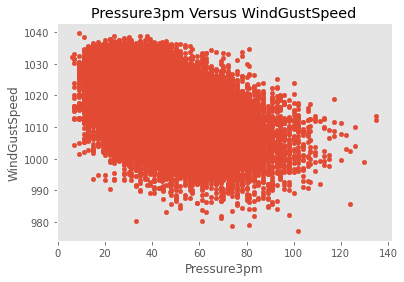

In [123]:
# Plot for clustered features

from matplotlib import pyplot as plt
plt.style.use("ggplot")

%matplotlib inline
X1 = df_model[['Pressure3pm','WindGustSpeed']].values
#X1 = df_model[['Cloud3pm','WindGustSpeed']].values

plt.scatter(X1[:, 1], X1[:, 0]+np.random.random(X1[:, 1].shape)/2, 
             s=20)
plt.xlabel('Pressure3pm'), plt.ylabel('WindGustSpeed')
plt.grid()
plt.title('Pressure3pm Versus WindGustSpeed')
plt.show()

eps 0.125 mpts 50 Average accuracy =  53.162091413428314 +- 6.105678997650765 Cluster size 29


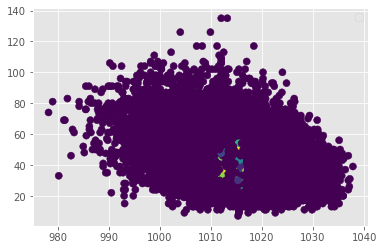

eps 0.125 mpts 100 Average accuracy =  53.899595418311996 +- 5.836705291775235 Cluster size 4


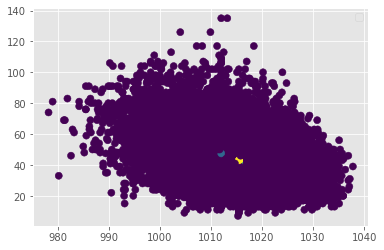

eps 0.125 mpts 200 Average accuracy =  54.16986973136706 +- 6.00905896997436 Cluster size 3


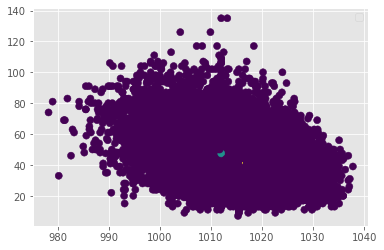

eps 0.125 mpts 300 Average accuracy =  54.16986973136706 +- 6.00905896997436 Cluster size 3


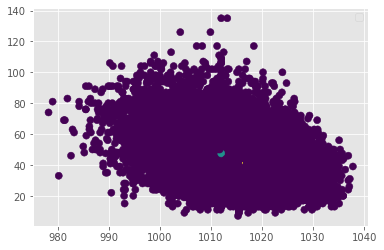

eps 0.2 mpts 50 Average accuracy =  54.236771755488334 +- 6.374964668007525 Cluster size 36


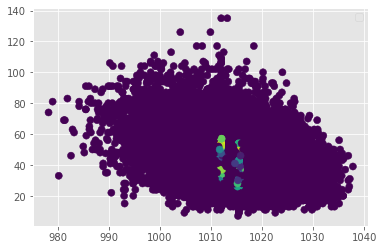

eps 0.2 mpts 100 Average accuracy =  54.16988893459482 +- 6.363648250751963 Cluster size 7


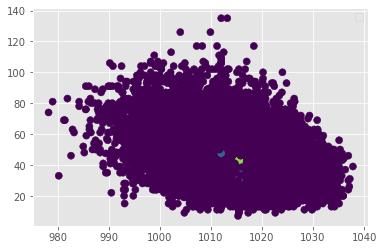

eps 0.2 mpts 200 Average accuracy =  54.0459027892183 +- 5.869040619142198 Cluster size 3


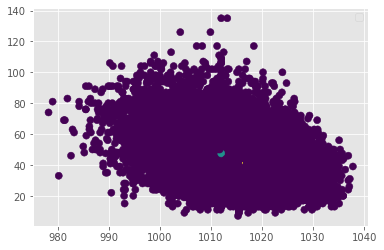

eps 0.2 mpts 300 Average accuracy =  54.0459027892183 +- 5.869040619142198 Cluster size 3


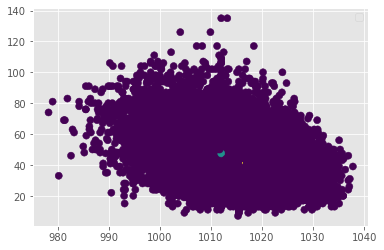

eps 0.3 mpts 50 Average accuracy =  53.77572449230203 +- 6.288950086270841 Cluster size 72


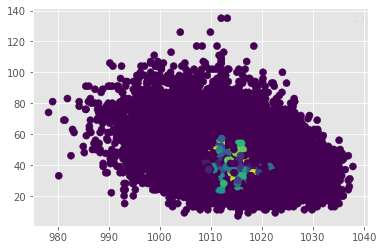

eps 0.3 mpts 100 Average accuracy =  53.75350534708825 +- 6.245653961836272 Cluster size 12


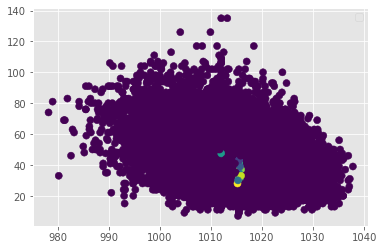

eps 0.3 mpts 200 Average accuracy =  54.46240361748382 +- 6.4930888586422775 Cluster size 3


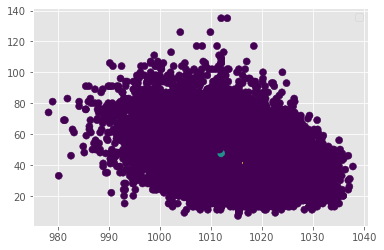

eps 0.3 mpts 300 Average accuracy =  54.46240361748382 +- 6.4930888586422775 Cluster size 3


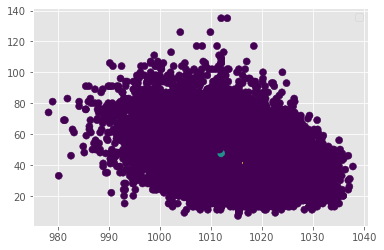

eps 0.5 mpts 50 Average accuracy =  53.38478922436142 +- 6.869095413391369 Cluster size 53


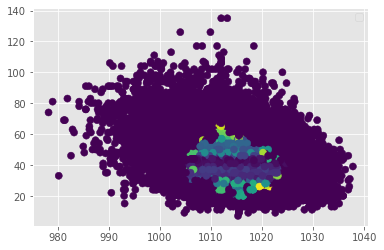

eps 0.5 mpts 100 Average accuracy =  52.44667819534129 +- 5.1275113168057596 Cluster size 31


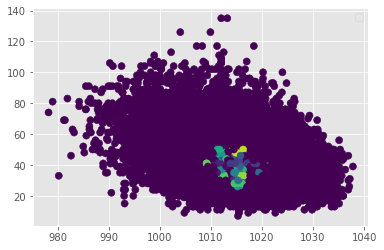

eps 0.5 mpts 200 Average accuracy =  54.11585004098372 +- 5.97092650732942 Cluster size 3


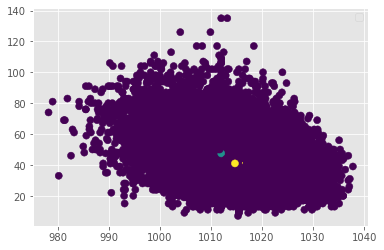

eps 0.5 mpts 300 Average accuracy =  54.11585004098372 +- 5.97092650732942 Cluster size 3


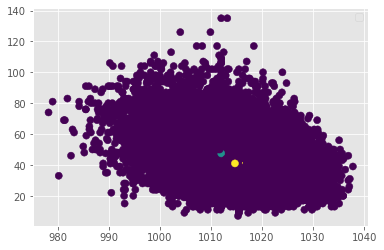

eps 0.7 mpts 50 Average accuracy =  53.35608343094973 +- 5.446134680454258 Cluster size 34


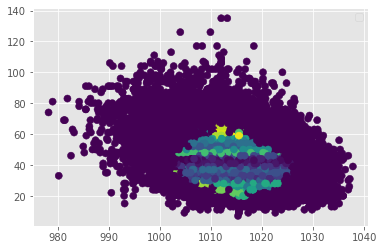

eps 0.7 mpts 100 Average accuracy =  52.46259564976143 +- 4.9800447009634805 Cluster size 25


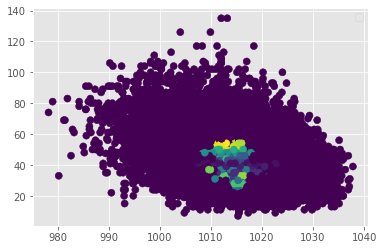

eps 0.7 mpts 200 Average accuracy =  53.6835570846266 +- 6.188456698161576 Cluster size 3


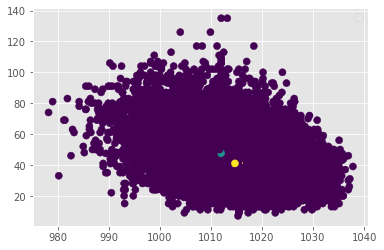

eps 0.7 mpts 300 Average accuracy =  53.6835570846266 +- 6.188456698161576 Cluster size 3


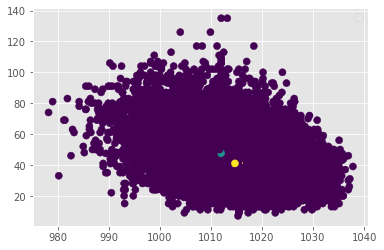

eps 0.9 mpts 50 Average accuracy =  53.75019632773643 +- 5.670152027184132 Cluster size 36


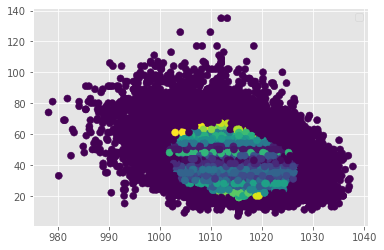

eps 0.9 mpts 100 Average accuracy =  53.74398863168916 +- 6.39247805713067 Cluster size 27


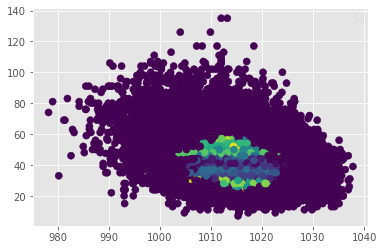

eps 0.9 mpts 200 Average accuracy =  52.67544725833496 +- 4.875720944749368 Cluster size 11


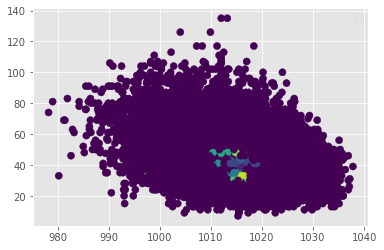

eps 0.9 mpts 300 Average accuracy =  54.02695829968558 +- 6.716288115870711 Cluster size 3


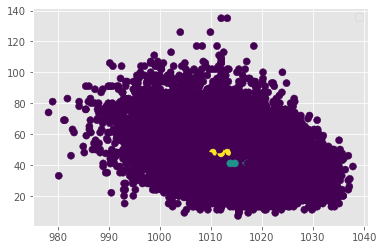

CPU times: user 55.7 s, sys: 2.63 s, total: 58.4 s
Wall time: 40.2 s


In [182]:
%%time

# DBSCAN Clustering & Using the clustered feature in the Classifier

from sklearn.cluster import DBSCAN
df_model = df_model_copy.copy()

X1 = df_model[['Pressure3pm','WindGustSpeed']]
eps_values=[0.125, .2,.3,.5,.7,.9]
min_pts=[50,100,200,300]

dbscan_all_labels = []

for eps in eps_values:
    for mpts in min_pts:

        # append on the clustering
        cls = DBSCAN(eps=eps, min_samples=mpts)
        cls.fit(X1)
        dbscan_labels = cls.labels_ # the labels from kmeans clustering

        y = df_model['IsRainTomorrow']
        X = df_model[['Humidity3pm','Sunshine','MaxTemp']]
        X = np.column_stack((X1,pd.get_dummies(dbscan_labels)))
        dbscan_all_labels.append(dbscan_labels)
        acc = cross_val_score(sdg_clf,X,y=y,cv=cv)

        print ("eps", eps, "mpts", mpts,"Average accuracy = ", acc.mean()*100, "+-", acc.std()*100, "Cluster size",len(np.unique(dbscan_labels)) )
        
        plt.legend(y)
        plt.scatter(X[:, 0], X[:, 1], s=50,c=cls.labels_.astype(float))
        #centers = cls.cluster_centers_
        #plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)
        #print("another graph")
        plt.show()
        plt.close()

# Reference: https://nbviewer.jupyter.org/github/jakemdrew/DataMiningNotebooks/blob/master/09.%20Clustering%20and%20Discretization.ipynb

In [116]:
X1 = df_model[['Pressure3pm','WindGustSpeed']]
cls = DBSCAN(eps=0.125, min_samples=300)
cls.fit(X1)
dbscan_labels_bf = cls.labels_ 



In [110]:
X1

30

It seems that about the best we can do with this DBSCAN discretization method is around 93%, which is very close to the accuracy without clustered data, and the standard deviation is also within reasonable range, so the clustering in this range is pretty reasonable.

It seems that DBSCAN has good clusterings for this dataset that are able to capture some of the nuances for the attributes. Although this is not spatial data, it is interesting that contiguous clustering helps discretize the data a bit (for a small range of eps and minpts). 
Even so, we can try more enhanced density based clustering technique which does not have dependency on the epislon radius and it tends to do well depending on our dataset, which now makes us to try OPTICS clustering method.

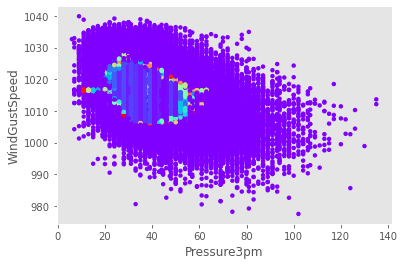

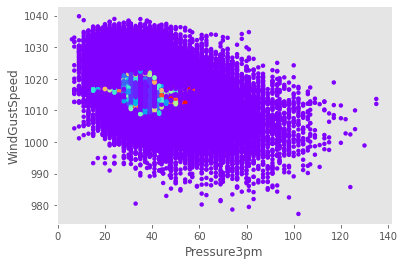

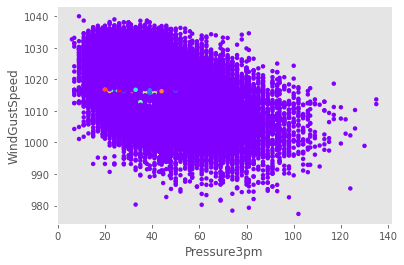

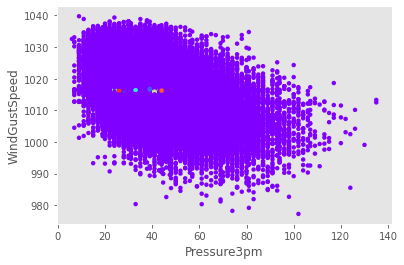

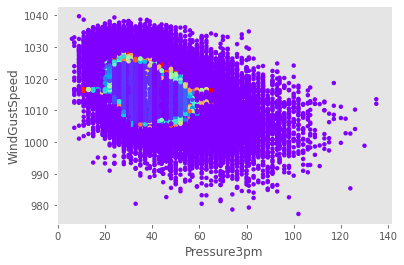

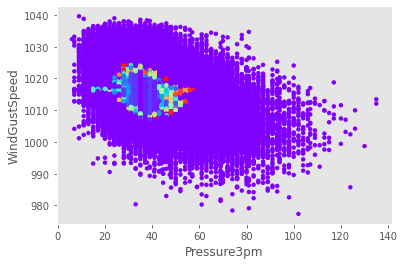

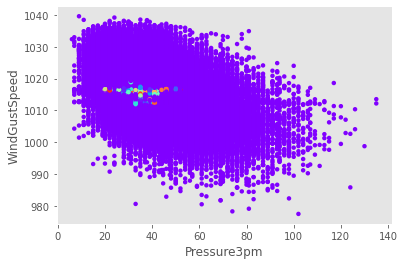

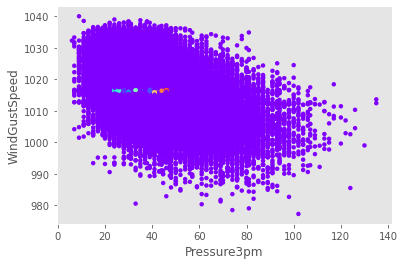

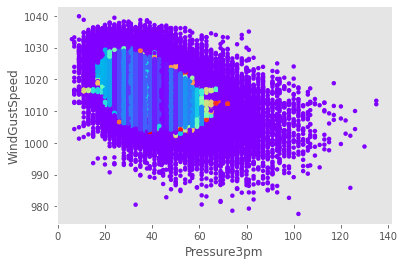

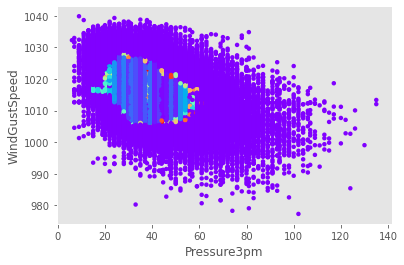

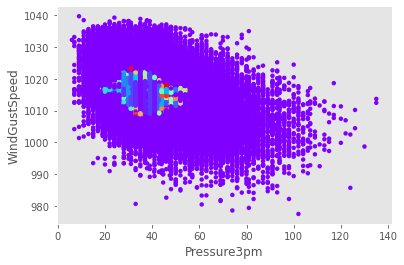

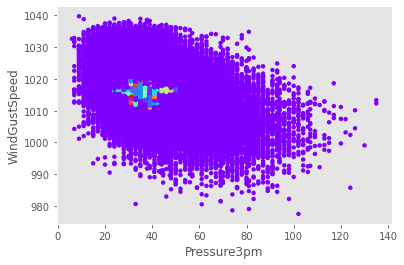

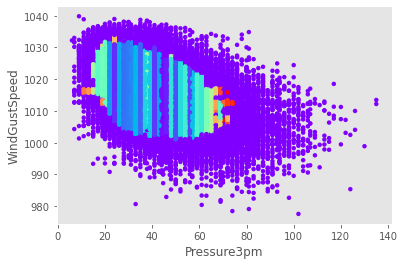

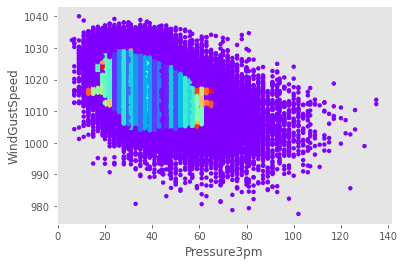

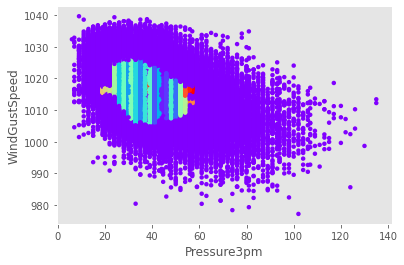

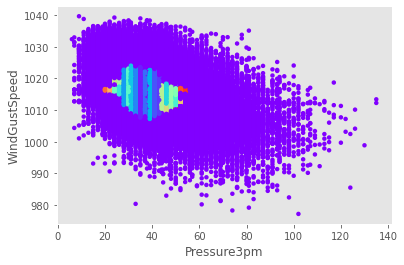

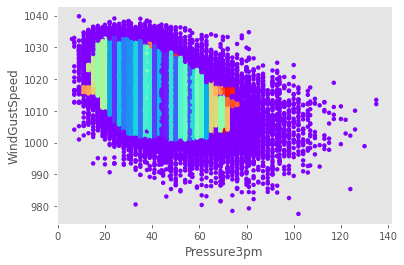

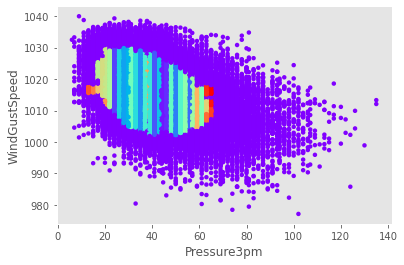

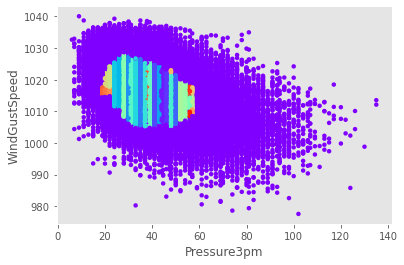

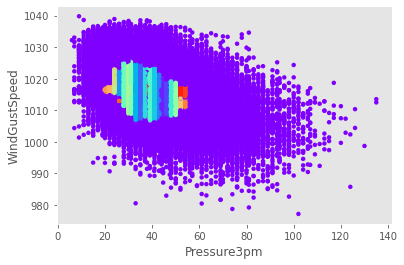

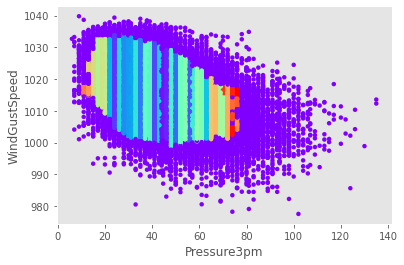

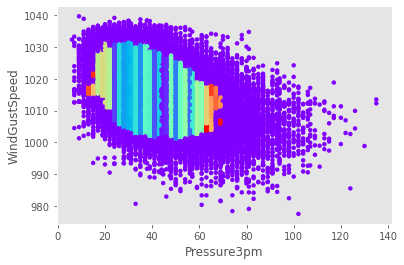

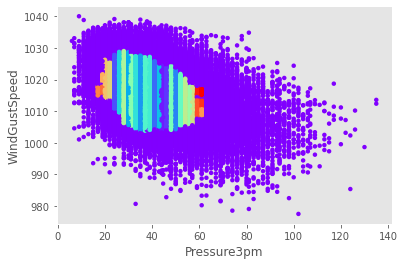

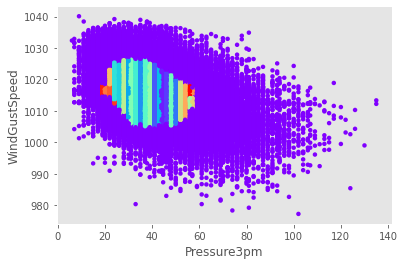

In [128]:
# DBSCAN Clustering Plot


#X1=X1

for dbscan_all_labels_each in dbscan_all_labels:
    plt.figure()
    plt.scatter(X1[:, 1], X1[:, 0]+np.random.random(X1[:, 0].shape)/2, c=dbscan_all_labels_each, cmap=plt.cm.rainbow, s=20, linewidths=0)
    plt.xlabel('Pressure3pm'), plt.ylabel('WindGustSpeed')
    plt.grid()

# Reference: https://nbviewer.jupyter.org/github/jakemdrew/DataMiningNotebooks/blob/master/09.%20Clustering%20and%20Discretization.ipynb

In [136]:
#Downsampling before we run our models 
df_model_copy = df_model[df_model.IsRainToday  == np.random.choice(df_model['IsRainTomorrow'].unique())].reset_index(drop=True)
df_model = df_model_copy.copy()

In [168]:
%%time

# OPTICS Clustering & Using the clustered feature in the Classifier

from sklearn.cluster import OPTICS, cluster_optics_dbscan
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import numpy as np

df_model = df_model_copy.copy()
X1 = df_model[['Pressure3pm','WindGustSpeed']]

eps_values=[0.8]
min_pts=[400]

optics_labels_all = []

for eps in eps_values:
    for mpts in min_pts:
        clust = OPTICS(min_samples=mpts, eps=eps)
        #clust = OPTICS(eps=0.8, min_samples=10)
        #clust = OPTICS(eps=0.8, min_samples=10, min_cluster_size=4)
        clust.fit(X1)
        optics_labels = clust.labels_ # the labels from kmeans clustering

        y = df_model['IsRainTomorrow']

        X = df_model[['Humidity3pm','Sunshine','MaxTemp']]
        X = np.column_stack((X1,pd.get_dummies(optics_labels)))
        optics_labels_all.append(optics_labels)
        acc = cross_val_score(sdg_clf,X,y=y,cv=cv)

        print ("eps", eps, "mpts", mpts,"Average accuracy = ", acc.mean()*100, "+-", acc.std()*100, "Cluster size",len(np.unique(optics_labels)) )

# Reference: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.OPTICS.html#sklearn.cluster.OPTICS
# Reference: https://www.kaggle.com/abdulmeral/10-models-for-clustering

eps 0.8 mpts 400 Average accuracy =  53.49595670986046 +- 5.869009374724261 Cluster size 3
CPU times: user 1min 30s, sys: 3.08 s, total: 1min 33s
Wall time: 1min 34s


In [144]:
X1

,Pressure3pm,WindGustSpeed
0,1005.7,28.0
1,1004.2,31.0
2,993.0,61.0
3,1001.8,44.0
4,1002.2,63.0
...,...,...
31450,1004.9,30.0
31451,1015.3,30.0
31452,1014.7,35.0
31453,1015.8,46.0


[-1 -1 -1 ... -1 -1 -1]


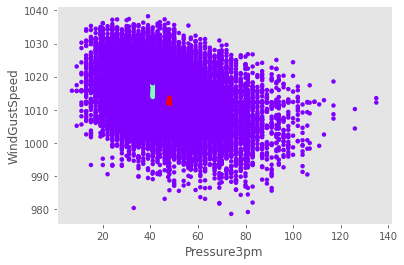

In [169]:
# OPTICS Clustering Plot
X1=X1.values

for optics_labels_e in optics_labels_all:
    plt.figure()
    plt.scatter(X1[:, 1], X1[:, 0]+np.random.random(X1[:, 0].shape)/2, c=optics_labels_e, cmap=plt.cm.rainbow, s=20, linewidths=0)
    plt.xlabel('Pressure3pm'), plt.ylabel('WindGustSpeed')
    plt.grid()
    print(optics_labels_e)

In [156]:
len(np.unique(optics_labels_e))

1

In [170]:
# Silhouette Score for OPTICS Clustering 
from sklearn.metrics import silhouette_score

score_op = metrics.silhouette_score(X1,optics_labels_e)
print("Score of Mean Shift = ", score_op)

# Reference: https://www.kaggle.com/abdulmeral/10-models-for-clustering

Score of Mean Shift =  -0.3826495162193218


The reachability distances generated by OPTICS allow for variable density extraction of clusters within a single data set. As shown in the above plot, combining reachability distances and data set `ordering_` produces a reachability plot, where point density is represented on the Y-axis, and points are ordered such that nearby points are adjacent. ‘Cutting’ the reachability plot at a single value produces DBSCAN like results; all points above the ‘cut’ are classified as noise, and each time that there is a break when reading from left to right signifies a new cluster. The default cluster extraction with OPTICS looks at the steep slopes within the graph to find clusters, and the user can define what counts as a steep slope using the parameter `xi`. There are also other possibilities for analysis on the graph itself, such as generating hierarchical representations of the data through reachability-plot dendrograms, and the hierarchy of clusters detected by the algorithm can be accessed through the `cluster_hierarchy_` parameter. The plot above has been color-coded so that cluster colors in planar space match the linear segment clusters of the reachability plot. Note that the blue and red clusters are adjacent in the reachability plot, and can be hierarchically represented as children of a larger parent cluster.

##### OPTICS Clustering v/s DBSCAN Clustering:

The results from OPTICS cluster_optics_dbscan method and DBSCAN are very similar, but not always identical; specifically, labeling of periphery and noise points. This is in part because the first samples of each dense area processed by OPTICS have a large reachability value while being close to other points in their area, and will thus sometimes be marked as noise rather than periphery. This affects adjacent points when they are considered as candidates for being marked as either periphery or noise.

Note that for any single value of eps, DBSCAN will tend to have a shorter run time than OPTICS; however, for repeated runs at varying eps values, a single run of OPTICS may require less cumulative runtime than DBSCAN. It is also important to note that OPTICS’ output is close to DBSCAN’s only if eps and max_eps are close.

`Memory Cost`: The OPTICS clustering technique requires more memory as it maintains a priority queue (Min Heap) to determine the next data point which is closest to the point currently being processed in terms of Reachability Distance. It also requires more computational power because the nearest neighbour queries are more complicated than radius queries in DBSCAN.

`Fewer Parameters`: The OPTICS clustering technique does not need to maintain the epsilon parameter and is only given generally if at all to reduce the time taken. This leads to the reduction of the analytical process of parameter tuning.

Optics technique does not segregate the given data into clusters. It merely produces a Reachability distance plot and it is upon the interpretation of the programmer to cluster the points accordingly.

###### Reference: https://www.geeksforgeeks.org/ml-optics-clustering-explanation/

##### Computational Complexity for OPTICS

Spatial indexing trees are used to avoid calculating the full distance matrix, and allow for efficient memory usage on large sets of samples. Different distance metrics can be supplied via the metric keyword.

For large datasets, similar (but not identical) results can be obtained via HDBSCAN. The HDBSCAN implementation is multithreaded, and has better algorithmic runtime complexity than OPTICS, at the cost of worse memory scaling. For extremely large datasets that exhaust system memory using HDBSCAN, OPTICS will maintain  (as opposed to ) memory scaling; however, tuning of the max_eps parameter will likely need to be used to give a solution in a reasonable amount of wall time.

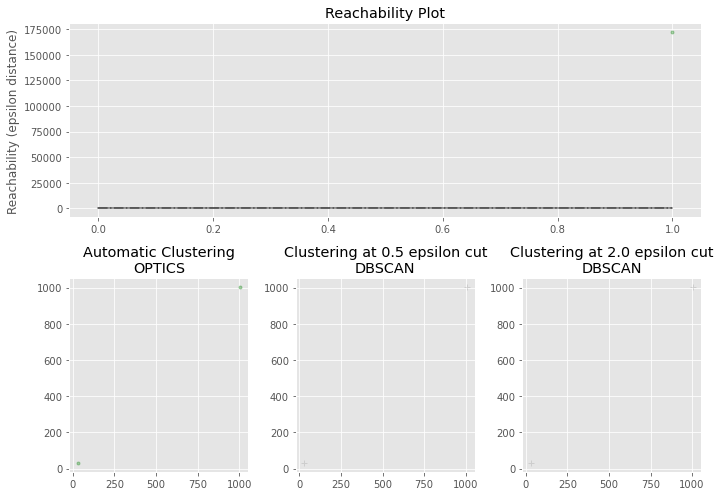

In [161]:
# Sample OPTICS code

from sklearn.cluster import OPTICS, cluster_optics_dbscan
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import numpy as np

# Generate sample data

#np.random.seed(0)
#n_points_per_cluster = 250

# X = df_model[['Cloud3pm','Pressure9am','Humidity3pm','WindGustSpeed','Sunshine','Pressure3pm','MinTemp']]
C1 = df_model['Pressure3pm']
C2 = df_model['WindGustSpeed']
#C3 = df_model['WindGustSpeed']
#C4 = df_model['Sunshine']
#C5 = df_model['Pressure3pm']
#C6 = df_model['MinTemp']
#X = np.vstack((C1, C2, C3, C4, C5, C6))
X = np.vstack((C1, C2))

clust = OPTICS(min_samples=2, xi=.05, min_cluster_size=.05)

# Run the fit
clust.fit(X)

labels_050 = cluster_optics_dbscan(reachability=clust.reachability_,
                                   core_distances=clust.core_distances_,
                                   ordering=clust.ordering_, eps=0.5)
labels_200 = cluster_optics_dbscan(reachability=clust.reachability_,
                                   core_distances=clust.core_distances_,
                                   ordering=clust.ordering_, eps=2)

space = np.arange(len(X))
reachability = clust.reachability_[clust.ordering_]
labels = clust.labels_[clust.ordering_]

plt.figure(figsize=(10, 7))
G = gridspec.GridSpec(2, 3)
ax1 = plt.subplot(G[0, :])
ax2 = plt.subplot(G[1, 0])
ax3 = plt.subplot(G[1, 1])
ax4 = plt.subplot(G[1, 2])

# Reachability plot
colors = ['g.', 'r.', 'b.', 'y.', 'c.']
for klass, color in zip(range(0, 5), colors):
    Xk = space[labels == klass]
    Rk = reachability[labels == klass]
    ax1.plot(Xk, Rk, color, alpha=0.3)
ax1.plot(space[labels == -1], reachability[labels == -1], 'k.', alpha=0.3)
ax1.plot(space, np.full_like(space, 2., dtype=float), 'k-', alpha=0.5)
ax1.plot(space, np.full_like(space, 0.5, dtype=float), 'k-.', alpha=0.5)
ax1.set_ylabel('Reachability (epsilon distance)')
ax1.set_title('Reachability Plot')

# OPTICS
colors = ['g.', 'r.', 'b.', 'y.', 'c.']
for klass, color in zip(range(0, 5), colors):
    Xk = X[clust.labels_ == klass]
    ax2.plot(Xk[:, 0], Xk[:, 1], color, alpha=0.3)
ax2.plot(X[clust.labels_ == -1, 0], X[clust.labels_ == -1, 1], 'k+', alpha=0.1)
ax2.set_title('Automatic Clustering\nOPTICS')

# DBSCAN at 0.5
colors = ['g', 'greenyellow', 'olive', 'r', 'b', 'c']
for klass, color in zip(range(0, 6), colors):
    Xk = X[labels_050 == klass]
    ax3.plot(Xk[:, 0], Xk[:, 1], color, alpha=0.3, marker='.')
ax3.plot(X[labels_050 == -1, 0], X[labels_050 == -1, 1], 'k+', alpha=0.1)
ax3.set_title('Clustering at 0.5 epsilon cut\nDBSCAN')

# DBSCAN at 2.
colors = ['g.', 'm.', 'y.', 'c.']
for klass, color in zip(range(0, 4), colors):
    Xk = X[labels_200 == klass]
    ax4.plot(Xk[:, 0], Xk[:, 1], color, alpha=0.3)
ax4.plot(X[labels_200 == -1, 0], X[labels_200 == -1, 1], 'k+', alpha=0.1)
ax4.set_title('Clustering at 2.0 epsilon cut\nDBSCAN')

plt.tight_layout()
plt.show()

# Reference: https://scikit-learn.org/stable/auto_examples/cluster/plot_optics.html#sphx-glr-auto-examples-cluster-plot-optics-py

IndexError: boolean index did not match indexed array along dimension 0; dimension is 1500 but corresponding boolean dimension is 31455

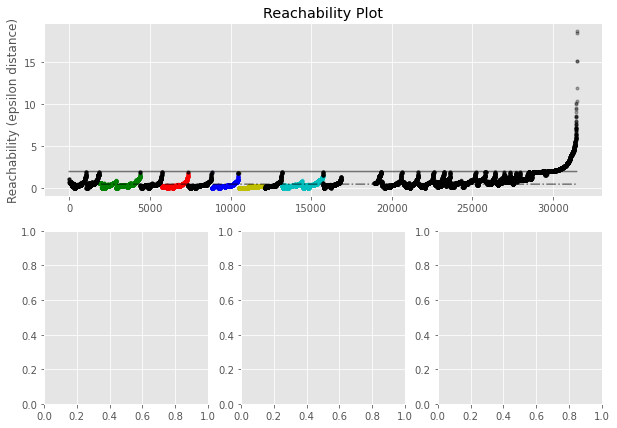

In [163]:
# Sample OPTICS code

from sklearn.cluster import OPTICS, cluster_optics_dbscan
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import numpy as np

# Generate sample data

np.random.seed(0)
n_points_per_cluster = 250

C1 = [-5, -2] + .8 * np.random.randn(n_points_per_cluster, 2)
C2 = [4, -1] + .1 * np.random.randn(n_points_per_cluster, 2)
C3 = [1, -2] + .2 * np.random.randn(n_points_per_cluster, 2)
C4 = [-2, 3] + .3 * np.random.randn(n_points_per_cluster, 2)
C5 = [3, -2] + 1.6 * np.random.randn(n_points_per_cluster, 2)
C6 = [5, 6] + 2 * np.random.randn(n_points_per_cluster, 2)
X = np.vstack((C1, C2, C3, C4, C5, C6))

clust = OPTICS(min_samples=50, xi=.05, min_cluster_size=.05)

# Run the fit
clust.fit(X1)

labels_050 = cluster_optics_dbscan(reachability=clust.reachability_,
                                   core_distances=clust.core_distances_,
                                   ordering=clust.ordering_, eps=0.5)
labels_200 = cluster_optics_dbscan(reachability=clust.reachability_,
                                   core_distances=clust.core_distances_,
                                   ordering=clust.ordering_, eps=2)

space = np.arange(len(X1))
reachability = clust.reachability_[clust.ordering_]
labels = clust.labels_[clust.ordering_]

plt.figure(figsize=(10, 7))
G = gridspec.GridSpec(2, 3)
ax1 = plt.subplot(G[0, :])
ax2 = plt.subplot(G[1, 0])
ax3 = plt.subplot(G[1, 1])
ax4 = plt.subplot(G[1, 2])

# Reachability plot
colors = ['g.', 'r.', 'b.', 'y.', 'c.']
for klass, color in zip(range(0, 5), colors):
    Xk = space[labels == klass]
    Rk = reachability[labels == klass]
    ax1.plot(Xk, Rk, color, alpha=0.3)
ax1.plot(space[labels == -1], reachability[labels == -1], 'k.', alpha=0.3)
ax1.plot(space, np.full_like(space, 2., dtype=float), 'k-', alpha=0.5)
ax1.plot(space, np.full_like(space, 0.5, dtype=float), 'k-.', alpha=0.5)
ax1.set_ylabel('Reachability (epsilon distance)')
ax1.set_title('Reachability Plot')

# OPTICS
colors = ['g.', 'r.', 'b.', 'y.', 'c.']
for klass, color in zip(range(0, 5), colors):
    Xk = X[clust.labels_ == klass]
    ax2.plot(Xk[:, 0], Xk[:, 1], color, alpha=0.3)
ax2.plot(X[clust.labels_ == -1, 0], X[clust.labels_ == -1, 1], 'k+', alpha=0.1)
ax2.set_title('Automatic Clustering\nOPTICS')

# DBSCAN at 0.5
colors = ['g', 'greenyellow', 'olive', 'r', 'b', 'c']
for klass, color in zip(range(0, 6), colors):
    Xk = X[labels_050 == klass]
    ax3.plot(Xk[:, 0], Xk[:, 1], color, alpha=0.3, marker='.')
ax3.plot(X[labels_050 == -1, 0], X[labels_050 == -1, 1], 'k+', alpha=0.1)
ax3.set_title('Clustering at 0.5 epsilon cut\nDBSCAN')

# DBSCAN at 2.
colors = ['g.', 'm.', 'y.', 'c.']
for klass, color in zip(range(0, 4), colors):
    Xk = X[labels_200 == klass]
    ax4.plot(Xk[:, 0], Xk[:, 1], color, alpha=0.3)
ax4.plot(X[labels_200 == -1, 0], X[labels_200 == -1, 1], 'k+', alpha=0.1)
ax4.set_title('Clustering at 2.0 epsilon cut\nDBSCAN')

plt.tight_layout()
plt.show()

# Reference: https://scikit-learn.org/stable/auto_examples/cluster/plot_optics.html#sphx-glr-auto-examples-cluster-plot-optics-py

In [164]:
from sklearn.cluster import OPTICS
import numpy as np

data = df_model[['Cloud3pm','Humidity3pm']]

model_op = OPTICS(eps=0.8, min_samples=10)
#
yhat_op = model_op.fit_predict(data)
clusters_op = np.unique(yhat_op)
print("Clusters of Mean Shift.",clusters_op)
labels_op = model_op.labels_

# Reference: https://www.kaggle.com/abdulmeral/10-models-for-clustering

Clusters of Mean Shift. [ -1   0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16
  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34
  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52
  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70
  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88
  89  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106
 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124
 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142
 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160
 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178
 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196
 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214
 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232
 233 234 235 236 237 238 23

In [165]:
from sklearn.metrics import silhouette_score

score_op = metrics.silhouette_score(data,labels_op)
print("Score of Mean Shift = ", score_op)

# Reference: https://www.kaggle.com/abdulmeral/10-models-for-clustering

Score of Mean Shift =  0.9484452825373411


# Ravi

### K-Means++

In [171]:
def rain_month(row):
    date_val = row["Date"]
    month = date_val.split("/")[0]
    return month

df_model["Month"] = df_model.apply(rain_month, axis=1)



KeyError: 'Date'

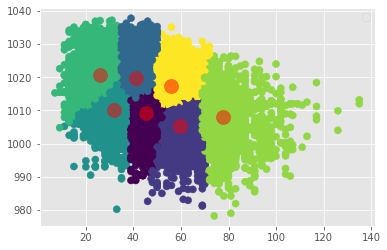

In [173]:
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split

X= df_model[['WindGustSpeed', 'Pressure3pm']].values
y = df_model["IsRainTomorrow"]

#init = "random"
init = "k-means++"

kmeans = KMeans(n_clusters=7, random_state=123, init=init, algorithm="auto").fit(X)

plt.legend(y)
plt.scatter(X[:, 0], X[:, 1], s=50,c=kmeans.labels_.astype(float))



centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)

algo auto init k-means++ Average accuracy =  52.135201841084196 +- 5.306283127069378 Cluster size 8


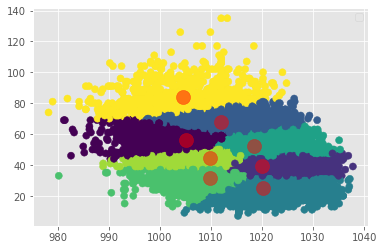

algo auto init random Average accuracy =  50.946413898285556 +- 4.192561374836622 Cluster size 8


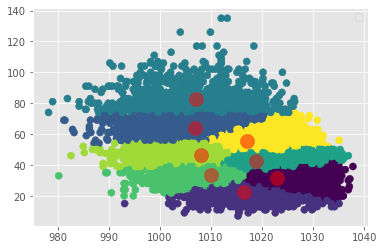

algo elkan init k-means++ Average accuracy =  52.135201841084196 +- 5.306283127069378 Cluster size 8


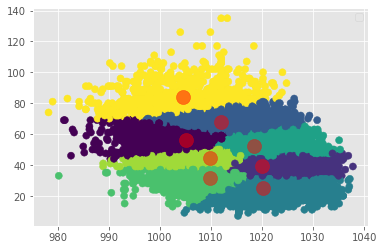

algo elkan init random Average accuracy =  50.946413898285556 +- 4.192561374836622 Cluster size 8


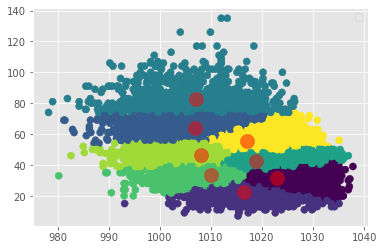

CPU times: user 20 s, sys: 2.17 s, total: 22.2 s
Wall time: 7.26 s


In [184]:
%%time

# OPTICS Clustering & Using the clustered feature in the Classifier

from sklearn.cluster import OPTICS, cluster_optics_dbscan
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import numpy as np

df_model = df_model_copy.copy()
X1 = df_model[['Pressure3pm','WindGustSpeed']]

eps_values=[0.8]
inits = ["k-means++", "random"]

algos=['auto', "elkan"]

kmeans_labels_all = []

for algo in algos:
    for init in inits:
        
        kmeans = KMeans(random_state=123, init=init, algorithm=algo).fit(X1)
        #clust = OPTICS(eps=0.8, min_samples=10)
        #clust = OPTICS(eps=0.8, min_samples=10, min_cluster_size=4)
       
        kmeans_labels = kmeans.labels_ # the labels from kmeans clustering

        y = df_model['IsRainTomorrow']

        X = df_model[['Humidity3pm','Sunshine','MaxTemp']]
        X = np.column_stack((X1,pd.get_dummies(kmeans_labels)))
        kmeans_labels_all.append(optics_labels)
        acc = cross_val_score(sdg_clf,X,y=y,cv=cv)

        print ("algo", algo, "init", init,"Average accuracy = ", acc.mean()*100, "+-", acc.std()*100, "Cluster size",len(np.unique(kmeans_labels)) )
        
        plt.legend(y)
        plt.scatter(X[:, 0], X[:, 1], s=50,c=kmeans.labels_.astype(float))
        centers = kmeans.cluster_centers_
        plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)
        plt.show()
        plt.close()

# Reference: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.OPTICS.html#sklearn.cluster.OPTICS
# Reference: https://www.kaggle.com/abdulmeral/10-models-for-clustering

In [ ]:
#del df_model["Date"]
#del df_model["Location"]
#del df_model["RainTomorrow"]

#df_model_copy = df_model.copy()

In [ ]:
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);


In [ ]:
df_model

In [185]:
from sklearn.metrics import pairwise_distances_argmin
from sklearn.metrics.pairwise import cosine_similarity

def find_clusters(X, n_clusters, rseed=2):
    # 1. Randomly choose clusters
    rng = np.random.RandomState(rseed)
    i = rng.permutation(X.shape[0])[:n_clusters]
    centers = X[i]
    
    while True:
        # 2a. Assign labels based on closest center
        labels = cosine_similarity(X, centers)
        
        # 2b. Find new centers from means of points
        new_centers = np.array([X[labels == i].mean(0)
                                for i in range(n_clusters)])
        
        # 2c. Check for convergence
        if np.all(centers == new_centers):
            break
        centers = new_centers
    
    return centers, labels

centers, labels = find_clusters(X, 63)
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis');

IndexError: boolean index did not match indexed array along dimension 1; dimension is 10 but corresponding boolean dimension is 63

In [ ]:
from time import time
from sklearn import metrics
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler


def bench_k_means(kmeans, name, data, labels):
    """Benchmark to evaluate the KMeans initialization methods.

    Parameters
    ----------
    kmeans : KMeans instance
        A :class:`~sklearn.cluster.KMeans` instance with the initialization
        already set.
    name : str
        Name given to the strategy. It will be used to show the results in a
        table.
    data : ndarray of shape (n_samples, n_features)
        The data to cluster.
    labels : ndarray of shape (n_samples,)
        The labels used to compute the clustering metrics which requires some
        supervision.
    """
    t0 = time()
    estimator = make_pipeline(StandardScaler(), kmeans).fit(data)
    fit_time = time() - t0
    results = [name, fit_time, estimator[-1].inertia_]

    # Define the metrics which require only the true labels and estimator
    # labels
    clustering_metrics = [
        metrics.homogeneity_score,
        metrics.completeness_score,
        metrics.v_measure_score,
        metrics.adjusted_rand_score,
        metrics.adjusted_mutual_info_score,
    ]
    results += [m(labels, estimator[-1].labels_) for m in clustering_metrics]

    # The silhouette score requires the full dataset
    results += [
        metrics.silhouette_score(data, estimator[-1].labels_,
                                 metric="euclidean", sample_size=300,)
    ]

    # Show the results
    formatter_result = ("{:9s}\t{:.3f}s\t{:.0f}\t{:.3f}\t{:.3f}"
                        "\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}")
    print(formatter_result.format(*results))

In [186]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

print(82 * '_')
print('init\t\ttime\tinertia\thomo\tcompl\tv-meas\tARI\tAMI\tsilhouette')

data = X
#labels = kmeans.labels_
n_digits = 2

kmeans = KMeans(init="k-means++", n_clusters=n_digits, n_init=4,
                random_state=0)
bench_k_means(kmeans=kmeans, name="k-means++", data=data, labels=labels)

kmeans = KMeans(init="random", n_clusters=n_digits, n_init=4, random_state=0)
bench_k_means(kmeans=kmeans, name="random", data=data, labels=labels)

pca = PCA(n_components=n_digits).fit(data)
kmeans = KMeans(init=pca.components_, n_clusters=n_digits, n_init=1)
bench_k_means(kmeans=kmeans, name="PCA-based", data=data, labels=labels)

print(82 * '_')

__________________________________________________________________________________
init		time	inertia	homo	compl	v-meas	ARI	AMI	silhouette


NameError: name 'bench_k_means' is not defined

In [ ]:
labels

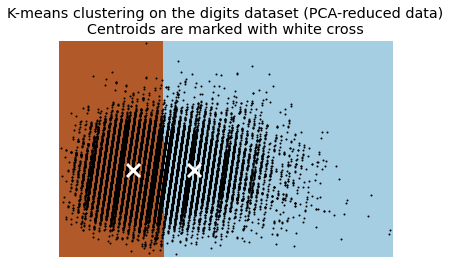

In [187]:
import matplotlib.pyplot as plt

reduced_data = PCA(n_components=2).fit_transform(data)
kmeans = KMeans(init="k-means++", n_clusters=n_digits, n_init=4)
kmeans.fit(reduced_data)

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = .02     # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation="nearest",
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired, aspect="auto", origin="lower")

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], marker="x", s=169, linewidths=3,
            color="w", zorder=10)
plt.title("K-means clustering on the digits dataset (PCA-reduced data)\n"
          "Centroids are marked with white cross")
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

In [ ]:
df_model.info()

# Apurv

### DBSCAN

In [188]:
#Read the Government data for State and Latitude/Longitude lookup to create a geography dataframe for Weather Australia
worldcities = pd.read_csv("worldcities.csv", header=[0], encoding = "ISO-8859-1", engine='python')
worldcities = worldcities[(worldcities.country == "Australia")]
worldcities.rename(columns={'city': 'Location', 'lat': 'Latitude', 'lng': 'Longitude', 'admin_name': 'State'}, inplace=True)
worldcities = worldcities.drop(['city_ascii','country','iso2','iso3','capital','population','id'],axis=1)
df_impute_temp = df_impute1
df_geo = pd.merge(df_impute_temp, worldcities, how="left", on=["Location"])
df_geo.head()


# Reference for World Cities data : https://simplemaps.com/data/world-cities

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Latitude,Longitude,State
0,12/1/08,Albury,13.4,22.9,0.6,6.032209,8.890686,W,44.0,W,...,1007.1,8.000000,3.684394,16.9,21.8,No,No,-36.0806,146.9158,New South Wales
1,12/2/08,Albury,7.4,25.1,0.0,6.032209,8.890686,WNW,44.0,NNW,...,1007.8,3.635105,3.684394,17.2,24.3,No,No,-36.0806,146.9158,New South Wales
2,12/3/08,Albury,12.9,25.7,0.0,6.032209,8.890686,WSW,46.0,W,...,1008.7,3.635105,2.000000,21.0,23.2,No,No,-36.0806,146.9158,New South Wales
3,12/4/08,Albury,9.2,28.0,0.0,6.032209,8.890686,NE,24.0,SE,...,1012.8,3.635105,3.684394,18.1,26.5,No,No,-36.0806,146.9158,New South Wales
4,12/5/08,Albury,17.5,32.3,1.0,6.032209,8.890686,W,41.0,ENE,...,1006.0,7.000000,8.000000,17.8,29.7,No,No,-36.0806,146.9158,New South Wales


In [189]:
import matplotlib.pyplot as plt

import mpl_toolkits

from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.basemap import Basemap
import matplotlib
from PIL import Image
import matplotlib.pyplot as plt
from pylab import rcParams
%matplotlib inline
rcParams['figure.figsize'] = (14,10)


ImportError: cannot import name 'dedent'

In [190]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
import sklearn.utils
import importlib
mpl_toolkits = importlib.import_module('mpl_toolkits')
from mpl_toolkits.basemap import Basemap

ImportError: cannot import name 'dedent'

In [193]:
!conda install Basemap -y

Solving environment: done

## Package Plan ##

  environment location: /Users/ravisivaraman/anaconda3

  added / updated specs:
    - basemap


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    basemap-1.2.1              |   py36hd2746df_2        15.2 MB  conda-forge
    conda-4.10.3               |   py36h79c6626_0         3.1 MB  conda-forge
    ------------------------------------------------------------
                                           Total:        18.3 MB

The following packages will be UPDATED:

  basemap            pkgs/main::basemap-1.2.0-py36hdfa6a0d~ --> conda-forge::basemap-1.2.1-py36hd2746df_2
  conda                               4.10.1-py36h79c6626_0 --> 4.10.3-py36h79c6626_0



basemap-1.2.1        | 15.2 MB   | ##################################### | 100% 
conda-4.10.3         | 3.1 MB    | ##################################### | 100% 
Preparing transaction: done

In [ ]:
df_geo.dropna(subset=["Longitude", "Latitude"], inplace=True)

In [ ]:
df_geo

In [ ]:
df_geo["Longitude"].describe()

In [ ]:
df_geo["Latitude"].describe()

Based on the Maximum and Minimum values of the longitude and latitude of locations in Australia, we set the upper and lower limits of latitude and longitude in our code below to print the locations on the Australia political map.

In [ ]:
llon = 110
ulon = 160
llat = -45
ulat = -10

df_geo = df_geo[(df_geo['Longitude']>llon) & (df_geo['Longitude']<ulon) & (df_geo['Latitude']>llat) & (df_geo['Latitude']<ulat)] 

my_map = Basemap(projection = 'merc', resolution = 'l', area_thresh = 1000,llcrnrlon = llon, llcrnrlat = llat, 
                urcrnrlon = ulon, urcrnrlat = ulat )
# Min and Max longitude and latitude

my_map.drawcoastlines()
my_map.drawcountries()
my_map.drawlsmask(land_color = 'orange', ocean_color='blue')
my_map.shadedrelief()
my_map.bluemarble()
# to collect data based on stations


xs,ys = my_map(np.asarray(df_geo.Longitude), np.asarray(df_geo.Latitude))

df_geo['xm'] = xs.tolist()
df_geo['ym'] = ys.tolist()


for index,row in df_geo.iterrows():
    r, g, b = np.random.uniform(0, 1, 3)
    x,y = my_map(row.Longitude, row.Latitude, row.Location)
    my_map.plot(row.xm, row.ym,markerfacecolor =([r,g,b,1]),  marker='x', markersize= 10, alpha = 0.9)
#plt.text(x,y,s)
plt.show()



In [ ]:
from sklearn.cluster import DBSCAN
import sklearn.utils
from sklearn.preprocessing import StandardScaler
sklearn.utils.check_random_state(123)
df_geo_cluster = df_geo[['xm','ym']]
df_geo_cluster = np.nan_to_num(df_geo_cluster)
df_geo_cluster = StandardScaler().fit_transform(df_geo_cluster)

# Compute DBSCAN
db = DBSCAN(eps=0.9, min_samples=100).fit(df_geo_cluster)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
df_geo["cluster"]=labels

realClusterNum=len(set(labels)) - (1 if -1 in labels else 0)
clusterNum = len(set(labels)) 


# A sample of clusters
df_geo[["Location","MinTemp","Evaporation","Rainfall","Pressure3pm","cluster"]].head(5)

In [ ]:
set(labels)

In [ ]:

from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
from pylab import rcParams
%matplotlib inline
rcParams['figure.figsize'] = (14,10)

my_map = Basemap(projection='merc',
            resolution = 'l', area_thresh = 1000.0,
            llcrnrlon=llon, llcrnrlat=llat, #min longitude (llcrnrlon) and latitude (llcrnrlat)
            urcrnrlon=ulon, urcrnrlat=ulat) #max longitude (urcrnrlon) and latitude (urcrnrlat)

my_map.drawcoastlines()
my_map.drawcountries()
my_map.drawmapboundary()
my_map.fillcontinents(color = 'white', alpha = 0.3)
my_map.shadedrelief()

# To create a color map
colors = plt.get_cmap('jet')(np.linspace(0.0, 1.0, clusterNum))



#Visualization1
for clust_number in set(labels):
    c=(([0.4,0.4,0.4]) if clust_number == -1 else colors[np.int(clust_number)])
    clust_set = df_geo[df_geo.cluster == clust_number]                    
    my_map.scatter(clust_set.xm, clust_set.ym, color =c,  marker='o', s= 20, alpha = 0.85)
    if clust_number != -1:
        cenx=np.mean(clust_set.xm) 
        ceny=np.mean(clust_set.ym) 
        plt.text(cenx,ceny,str(clust_number), fontsize=25, color='red',)
        print ("Cluster "+str(clust_number)+', Average WindGustSpeed: '+ str(np.mean(clust_set.WindGustSpeed))+ ', Average Rainfall: '+ str(np.mean(clust_set.Rainfall)))

In [ ]:
from sklearn.cluster import DBSCAN
import sklearn.utils
from sklearn.preprocessing import StandardScaler
sklearn.utils.check_random_state(1000)
df_geo_cluster = df_geo[['xm','ym','Rainfall','MaxTemp','Evaporation','Pressure3pm', 'Cloud3pm']]
df_geo_cluster = np.nan_to_num(df_geo_cluster)
df_geo_cluster = StandardScaler().fit_transform(df_geo_cluster)

# Compute DBSCAN
db = DBSCAN(eps=0.5, min_samples=75).fit(df_geo_cluster)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
df_geo["cluster"]=labels

realClusterNum=len(set(labels)) - (1 if -1 in labels else 0)
clusterNum = len(set(labels)) 


# A sample of clusters
df_geo[["Location","xm","ym","Rainfall","MaxTemp","Evaporation","Pressure3pm", "Cloud3pm","cluster"]].head(5)





In [ ]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
from pylab import rcParams
%matplotlib inline
rcParams['figure.figsize'] = (14,10)

my_map = Basemap(projection='merc',
            resolution = 'l', area_thresh = 1000.0,
            llcrnrlon=llon, llcrnrlat=llat, #min longitude (llcrnrlon) and latitude (llcrnrlat)
            urcrnrlon=ulon, urcrnrlat=ulat) #max longitude (urcrnrlon) and latitude (urcrnrlat)

my_map.drawcoastlines()
my_map.drawcountries()
#my_map.drawmapboundary()
my_map.fillcontinents(color = 'white', alpha = 0.3)
my_map.shadedrelief()

# To create a color map
colors = plt.get_cmap('rainbow')(np.linspace(0.0, 1.0, clusterNum))



#Visualization1
for clust_number in set(labels):
    c=(([0.4,0.4,0.4]) if clust_number == -1 else colors[np.int(clust_number)])
    clust_set = df_geo[df_geo.cluster == clust_number]                    
    my_map.scatter(clust_set.xm, clust_set.ym, color =c,  marker='o', s= 15, alpha = 0.9)
    if clust_number != -1:
        cenx=np.mean(clust_set.xm) 
        ceny=np.mean(clust_set.ym) 
        plt.text(cenx,ceny,str(clust_number), fontsize=20, color='red',)
        print ("Cluster "+str(clust_number)+', Average WindGustSpeed: '+ str(np.mean(clust_set.WindGustSpeed))+ ', Average Rainfall: '+ str(np.mean(clust_set.Rainfall)))

Reference: https://towardsdatascience.com/dbscan-algorithm-complete-guide-and-application-with-python-scikit-learn-d690cbae4c5d

Reference: https://codekarim.com/node/52

In [ ]:
df_pca = df_model.copy()
del df_pca['Temp9am']
del df_pca['Temp3pm']
del df_pca['WindSpeed9am']
del df_pca['WindSpeed3pm']
del df_pca['Date']
del df_pca['Location']
del df_pca['RainTomorrow']
del df_pca['Evaporation']
del df_pca['Rainfall']
del df_pca['Sunshine']
del df_pca['MinTemp']
del df_pca['MaxTemp']
del df_pca['Cloud9am']
del df_pca['Pressure9am']

del df_pca['IsRainToday']


X=df_pca.to_numpy()
y = df_model.RainTomorrow

In [ ]:
df_pca.columns

In [ ]:
# PCA Code

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# standardizing the features
X = StandardScaler().fit_transform(X)

pca = PCA(n_components = 2)

principalComponents = pca.fit_transform(X)

principalDF = pd.DataFrame(data = principalComponents)

#finalDF = pd.concat([principalDF, df[['RainTomorrow']]], axis =1)

plt.subplots(figsize=(6, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance');
print('Cumulative Explained variance of components: ',sum(pca.explained_variance_ratio_[0:199]) )
print(pca)


variation = pd.DataFrame(pca.explained_variance_ratio_)
cumulative_variation = pd.DataFrame(pca.explained_variance_ratio_.cumsum())
print("Variance explained by each component: ",variation)
print ("\n Cumulative Variance explained by additional component: ", cumulative_variation)

# Reference : https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60

In [ ]:
plt.figure(figsize=(15,6))
sns.heatmap(pca.components_,cmap='viridis',xticklabels = df_pca.columns.values , yticklabels =['First Component', 'Second'] )

In [ ]:
corr = df_pca.corr()

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

In [ ]:
plt.figure(figsize=(12,8))
plt.scatter(principalComponents[:,0], principalComponents[:,1], c=y,cmap =('jet'), edgecolor='none')


## Deployment

Our models are primarily designed for meteorologists. At the same time, these can be very useful for event organizers in cities across the country – mostly important for outdoor events. The favored model can be also useful for government organizations like military (Navy). The model not only predicts if it’s going to Rain Tomorrow (next day), It also predicts the amount of `Rainfall` for today in amount of rain fell (mm) as well as classifies as `Low`, `Medium` and `High`. Due to our ability to give the data which is easily interpretable for everyone, this is useful for the everyone. It can be integrated by the weather channels and apps as well. 


The model’s value can be measured in terms of its accuracy; higher the accuracy better the value of the model over existing models in use. Some parties may value our models higher than others depending upon how important the accuracy of prediction of Rainfall for their business or area of operations.


Our models can be integrated to the existing feed of weather related data which is useful for our model to predict accurately. This data is easily available from government websites. 


Data from those sources can be integrated with our model and build an APIs for anyone to consume and monetize by the count of API calls.


As we know weather is an ever-changing event and due to climate change, predictive models needs to evolve continuously. The validity of our models need to be tested against the recorded information and improve our models daily with the new data (models can be built within hours).


Additional data points may be required like seasons, time of the year, impact of natural events like cyclones/hurricanes, wild fires, El Niño and La Niña effects etc.


Overall, our classification models will be more useful since those clearly indicates weather condition for all the interested parties.

## Exceptional Work

#### Conclusion


